___
# Project-20_Brazil_Covid
___

In [283]:
# importing project dependencies:

# compute dependency
import numpy as np
# dataframe dependency
import pandas as pd
# visualization dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# stats dependency
from scipy import stats
# feature_engineering dependency
import feature_engine
# from scraping some data
import webbrowser

import os,sys
import warnings
warnings.filterwarnings('ignore')

In [284]:
# importing the dataset

In [285]:
df = pd.read_excel('covid19_clinical_dataset.xlsx')

In [286]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [287]:
df.sample(5)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
5037,e9de6996df522d9,0,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,5bbf3302a6a5845,18,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2650,5485121fcbc7025,11,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4567,76471362ef159a5,10,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [288]:
# shape of the dataset
df.shape

(5644, 111)

In [289]:
# columns of the dataset
df.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)

In [290]:
# datatypes of the features of the dataset
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 111 columns):
 #   Column                                                 Dtype  
---  ------                                                 -----  
 0   Patient ID                                             object 
 1   Patient age quantile                                   int64  
 2   SARS-Cov-2 exam result                                 object 
 3   Patient addmited to regular ward (1=yes, 0=no)         int64  
 4   Patient addmited to semi-intensive unit (1=yes, 0=no)  int64  
 5   Patient addmited to intensive care unit (1=yes, 0=no)  int64  
 6   Hematocrit                                             float64
 7   Hemoglobin                                             float64
 8   Platelets                                              float64
 9   Mean platelet volume                                   float64
 10  Red blood Cells                                        float64
 11  Lym

In [291]:
# numerical feature description.
df.describe()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Mycoplasma pneumoniae,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Density,Urine - Sugar,Urine - Red blood cells,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.010000e+02,6.020000e+02,2.080000e+02,0.0,5.130000e+02,3.970000e+02,5.060000e+02,4.240000e+02,3.710000e+02,3.700000e+02,2.250000e+02,2.260000e+02,1.530000e+02,1.820000e+02,1.820000e+02,1.820000e+02,1.440000e+02,5.000000e+01,4.000000e+01,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.0,1.360000e+02,1.360000e+02,1.360000e+02,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,97.0,7.000000e+01,0.0,7.000000e+01,0.0,9.100000e+01,1.330000e+02,1.010000e+02,0.0,3.000000e+00,1.040000e+02,2.300000e+01,2.700000e+01,8.000000e+00,0.0,1.300000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
mean,9.318391,0.013997,0.008859,0.007264,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633740e-09,-3.453010e-09,7.206147e-09,-4.155369e-09,-3.220114e-09,1.020433e-08,7.069992e-09,NaN,5.908361e-09,-6.675260e-09,2.779703e-09,-6.679604e-09,2.038366e-08,1.123628e-08,2.719462e-09,-5.439583e-10,-1.479159e-09,-2.783733e-09,1.205602e-08,3.029357e-09,-2.037268e-09,1.907349e-08,-5.215406e-09,-1.935234e-08,1.509290e-08,-1.075130e-09,-7.909394e-09,0.0,-9.121483e-09,3.593467e-09,-4.416934e-09,2.611544e-09,-2.678753e-08,7.373770e-09,8.602732e-09,1.382582e-08,0.0,-2.554485e-09,NaN,7.557017e-09,NaN,-9.824941e-10,-4.733640e-09,1.733551e-09,NaN,-1.986821e-08,-6.483438e-09,7.288611e-09,-1.655685e-09,-3.725290e-09,NaN,-5.731216e-09,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000833e+00,1.000832e+00,1.002413e+00,NaN,1.000976e+00,1.001262e+00,1.000990e+00,1.001181e+00,1.001350e+00,1.001354e+00,1.002230e+00,1.002220e+00,1.003284e+00,1.002759e+00,1.002759e+00,1.002759e+00,1.003490e+00,1.010153e+00,1.012739e+00,1.003697e+00,1.003697e+00,1.0036

In [292]:
# helper function
def fig_of_size(x,y):
    return plt.figure(figsize=(x,y))

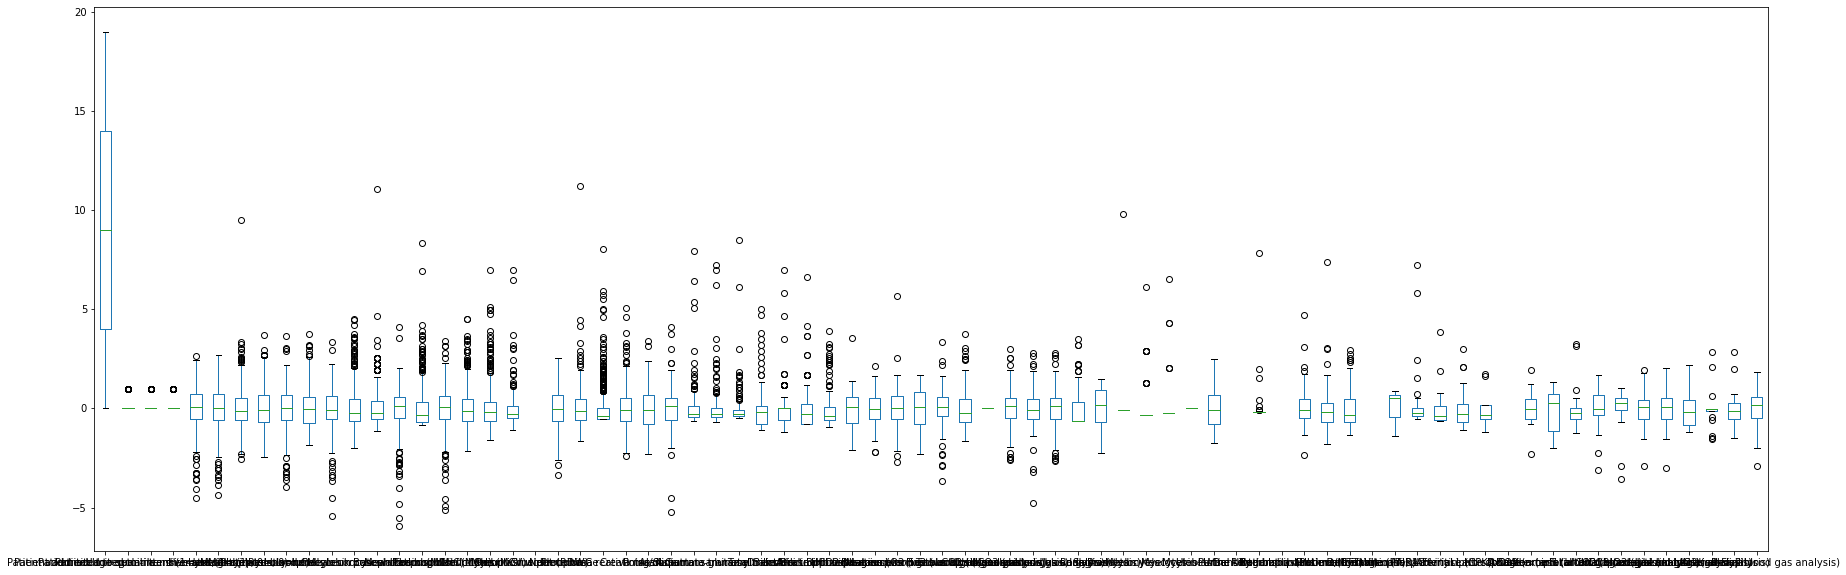

In [293]:
df.plot(kind='box',figsize=(30,10))

In [294]:
# checking for missing values
df.isna().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

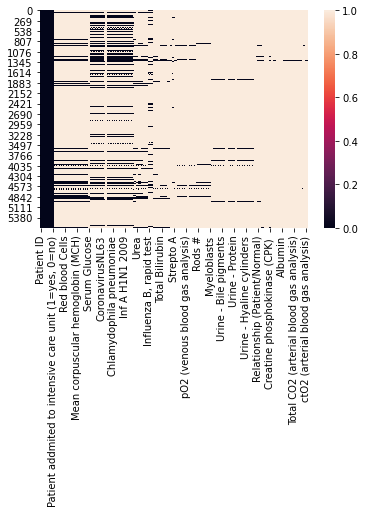

In [295]:

sns.heatmap(df.isna())

In [296]:
# checking for high correlations
df.corr()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Mycoplasma pneumoniae,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Density,Urine - Sugar,Urine - Red blood cells,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient age quantile,1.000000,0.046166,0.015736,-0.035772,0.096808,0.060320,-0.158683,0.119449,-0.037510,-0.125935,-0.124671,-0.166386,0.107525,0.197394,0.022085,0.281655,0.050962,0.166429,0.215857,NaN,0.086923,0.338425,0.088205,0.372614,0.001904,-0.004909,0.128795,0.038809,0.224382,0.145813,0.268306,0.008057,-0.480906,-0.309841,-0.127646,0.208016,-0.059379,0.555328,-0.071306,NaN,0.503174,0.256466,0.510971,0.046603,0.284189,1.300393e-01,0.179179,0.089347,NaN,-0.118386,NaN,0.159676,NaN,-0.122878,0.014032,-0.149753,NaN,0.981118,-0.100993,0.395562,0.097130,-0.357362,NaN,-0.137290,-0.223949,-0.469049,0.570445,0.570755,0.086133,0.166245,-0.098422,-0.334562,-0.511705,-0.061265
"Patient addmited to regular ward (1=yes, 0=no)",0.046166,1.000000,-0.011264,-0.010192,-0.087241,-0.091867,-0.183091,-0.013134,-0.053143,-0.095313,-0.034642,-0.103005,0.031833,-0.050703,-0.085636,-0.039326,-0.000354,0.102160,0.058746,NaN,0.127431,-0.012487,0.132841,0.085025,-0.027274,-0.087195,-0.003844,-0.006920,0.032191,-0.030038,-0.009977,-0.039898,-0.055231,-0.186539,-0.005717,-0.136158,-0.088179,0.041685,-0.070782,NaN,-0.040536,0.180598,-0.033669,0.084794,0.063084,-3.059950e-02,-0.034277,-0.069894,NaN,-0.202388,NaN,-0.048520,NaN,0.023895,-0.100331,0.117764,NaN,NaN,-0.080470,0.410411,-0.076085,0.315823,NaN,NaN,0.198186,-0.226778,0.033456,0.203640,-0.159803,-0.133434,0.105608,-0.173663,NaN,0.273102
"Patient addmited to semi-intensive unit (1=yes, 0=no)",0.015736,-0.011264,1.000000,-0.008087,-0.182215,-0.177142,0.006966,-0.023475,-0.137951,-0.110574,-0.023390,0.138304,-0.132984,-0.054479,-0.089780,-0.050871,-0.037916,0.092406,0.198328,NaN,0.087390,0.081907,0.241026,-0.033972,-0.013936,-0.127343,0.022051,0.084546,0.158065,0.026549,0.059037,-0.007131,0.296299,0.033610,-0.007857,-0.160453,0.151258,-0.026309,0.183427,NaN,-0.104426,0.136008,-0.097108,0.184783,0.082809,2.386304e-01,0.278811,0.416115,NaN,-0.141116,NaN,0.394227,NaN,-0.183185,0.083214,0.191216,NaN,0.615038,-0.001060,0.084403,0.024391,NaN,NaN,-0.661111,-0.559117,0.113153,-0.226234,-0.178971,-0.112624,-0.136503,-0.338690,-0.091269,0.185231,-0.049042
"Patient addmited to intensive care unit (1=yes, 0=no)",-0.035772,-0.010192,-0.008087,1.000000,-0.183850,-0.178878,0.125953,-0.073511,-0.120659,-0.109867,-0.036227,0.271681,-0.12

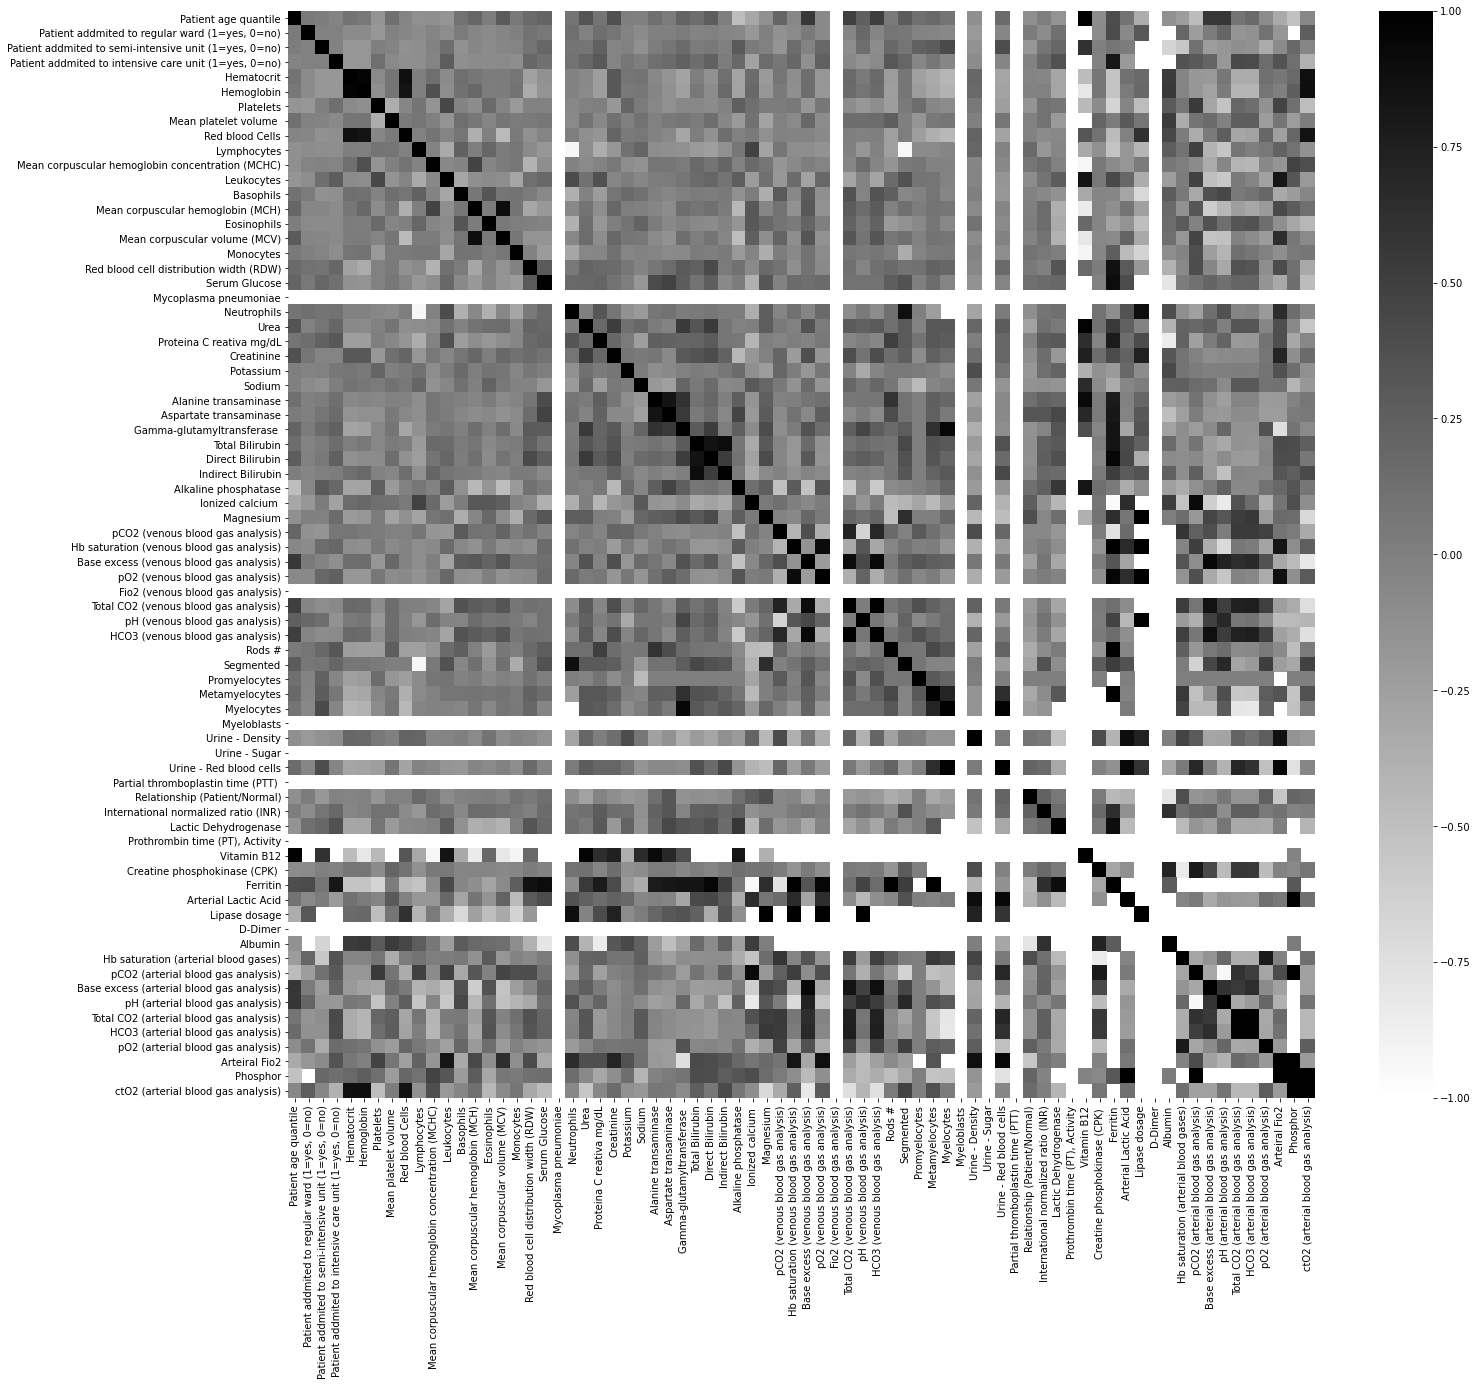

In [297]:
# visualization of correlations is much informative using the heatmaps
fig_of_size(23,20)
sns.heatmap(df.corr(),cmap='binary')

In [298]:
# seperating the numerical and categorical feautre
from feature_engine.missing_data_imputers import _find_categorical_variables,_find_numerical_variables
num_var = _find_numerical_variables(df)
cat_var = _find_categorical_variables(df)

In [299]:
num_var

['Patient age quantile',
 'Patient addmited to regular ward (1=yes, 0=no)',
 'Patient addmited to semi-intensive unit (1=yes, 0=no)',
 'Patient addmited to intensive care unit (1=yes, 0=no)',
 'Hematocrit',
 'Hemoglobin',
 'Platelets',
 'Mean platelet volume ',
 'Red blood Cells',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Leukocytes',
 'Basophils',
 'Mean corpuscular hemoglobin (MCH)',
 'Eosinophils',
 'Mean corpuscular volume (MCV)',
 'Monocytes',
 'Red blood cell distribution width (RDW)',
 'Serum Glucose',
 'Mycoplasma pneumoniae',
 'Neutrophils',
 'Urea',
 'Proteina C reativa mg/dL',
 'Creatinine',
 'Potassium',
 'Sodium',
 'Alanine transaminase',
 'Aspartate transaminase',
 'Gamma-glutamyltransferase\xa0',
 'Total Bilirubin',
 'Direct Bilirubin',
 'Indirect Bilirubin',
 'Alkaline phosphatase',
 'Ionized calcium\xa0',
 'Magnesium',
 'pCO2 (venous blood gas analysis)',
 'Hb saturation (venous blood gas analysis)',
 'Base excess (venous blood gas analy

In [300]:
cat_var

['Patient ID',
 'SARS-Cov-2 exam result',
 'Respiratory Syncytial Virus',
 'Influenza A',
 'Influenza B',
 'Parainfluenza 1',
 'CoronavirusNL63',
 'Rhinovirus/Enterovirus',
 'Coronavirus HKU1',
 'Parainfluenza 3',
 'Chlamydophila pneumoniae',
 'Adenovirus',
 'Parainfluenza 4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'Inf A H1N1 2009',
 'Bordetella pertussis',
 'Metapneumovirus',
 'Parainfluenza 2',
 'Influenza B, rapid test',
 'Influenza A, rapid test',
 'Strepto A',
 'Urine - Esterase',
 'Urine - Aspect',
 'Urine - pH',
 'Urine - Hemoglobin',
 'Urine - Bile pigments',
 'Urine - Ketone Bodies',
 'Urine - Nitrite',
 'Urine - Urobilinogen',
 'Urine - Protein',
 'Urine - Leukocytes',
 'Urine - Crystals',
 'Urine - Hyaline cylinders',
 'Urine - Granular cylinders',
 'Urine - Yeasts',
 'Urine - Color']

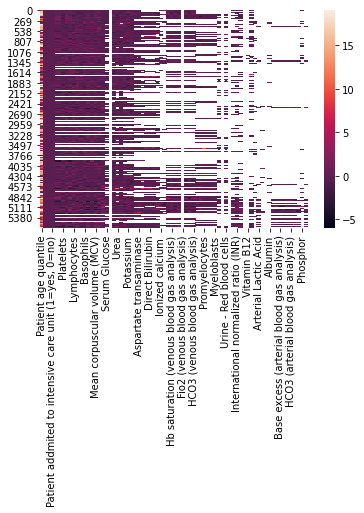

In [301]:
sns.heatmap(df[num_var])

In [302]:
df

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [303]:
df.isna().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

In [304]:
pd.set_option('display.max_columns',None)

In [305]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [306]:
df[~df.Hematocrit.isna()]

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8bb9d64f0215244,1,negative,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,-0.413208,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.127395,-0.067309,-0.286986,-1.838623,0.930020,0.503132,NaN,NaN,-0.586821,-0.162200,NaN,NaN,NaN,NaN,NaN,0.724353,NaN,1.075153,0.615594,-0.554737,-0.283748,-0.562902,NaN,0.104088,-0.855513,0.036345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.089481,0.296546,0.907723,NaN,NaN,-0.267856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730393,NaN
15,6c9d3323975b082,9,negative,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,-1

In [307]:
# helper function
def show_all_rows(query):
    pd.set_option('display.max_rows',None)
    print(query)
    pd.reset_option('display.max_rows')

In [308]:
show_all_rows(df.isna().mean())

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpu

## feature selection using high missing values column elimination

In [309]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [310]:
col_revised = []
for col in df.columns:
    if df[col].isna().mean() < 0.90:
        col_revised.append(col)

In [311]:
col_revised

['Patient ID',
 'Patient age quantile',
 'SARS-Cov-2 exam result',
 'Patient addmited to regular ward (1=yes, 0=no)',
 'Patient addmited to semi-intensive unit (1=yes, 0=no)',
 'Patient addmited to intensive care unit (1=yes, 0=no)',
 'Hematocrit',
 'Hemoglobin',
 'Platelets',
 'Mean platelet volume ',
 'Red blood Cells',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Leukocytes',
 'Basophils',
 'Mean corpuscular hemoglobin (MCH)',
 'Eosinophils',
 'Mean corpuscular volume (MCV)',
 'Monocytes',
 'Red blood cell distribution width (RDW)',
 'Respiratory Syncytial Virus',
 'Influenza A',
 'Influenza B',
 'Parainfluenza 1',
 'CoronavirusNL63',
 'Rhinovirus/Enterovirus',
 'Coronavirus HKU1',
 'Parainfluenza 3',
 'Chlamydophila pneumoniae',
 'Adenovirus',
 'Parainfluenza 4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'Inf A H1N1 2009',
 'Bordetella pertussis',
 'Metapneumovirus',
 'Parainfluenza 2',
 'Influenza B, rapid test',
 'Influenza A, rapid test']

In [312]:
df_cleaned = df[col_revised].copy()

In [313]:
df_cleaned

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* We are down to 39 features.

In [314]:
# let's drop the features with extremely high correlation

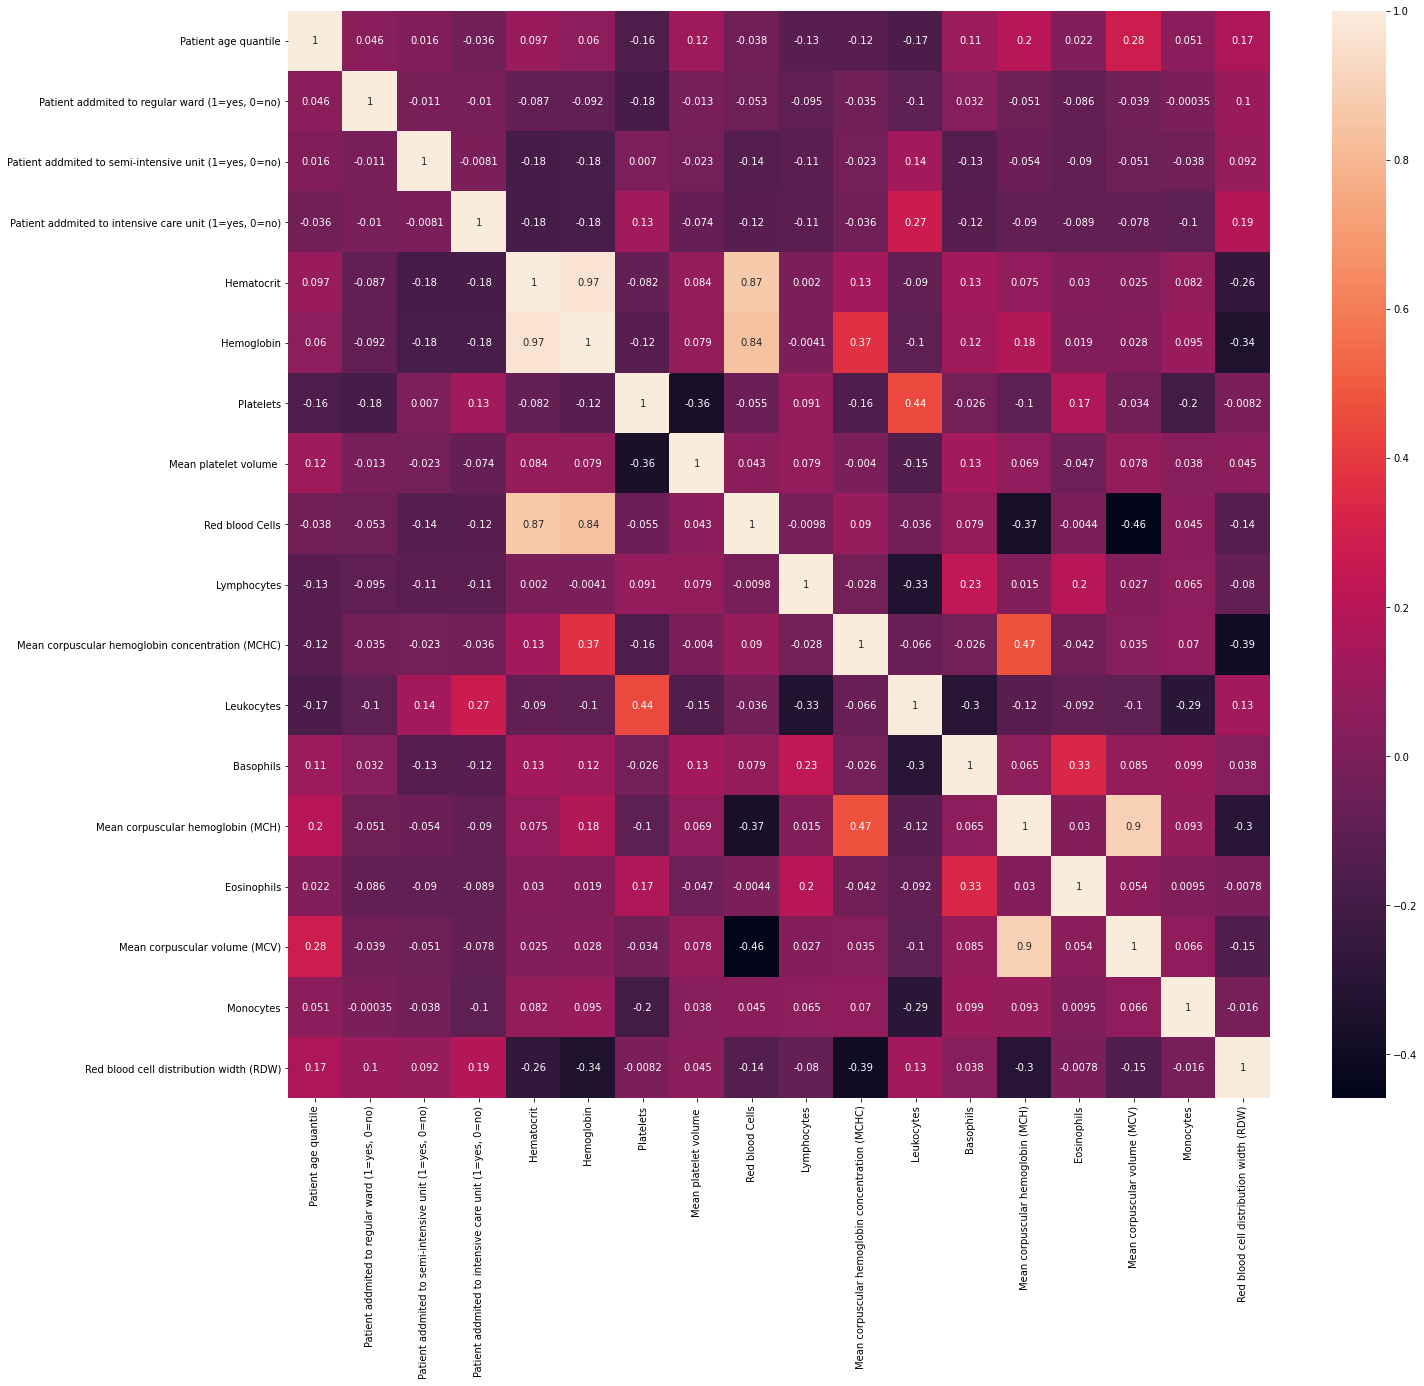

In [315]:
fig_of_size(22,20)
sns.heatmap(df_cleaned.corr(),annot=True)

* Features with very highcorrelation : 'Hematocrit' , 'Mean corpuscular volume (MCV)'

In [316]:
# dropping these features.

In [317]:
df_cleaned.drop(['Hematocrit','Mean corpuscular volume (MCV)'],1,inplace=True)

In [318]:
df_cleaned.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN


In [319]:
# also drop the Patient ID column
df_cleaned.drop('Patient ID',1,inplace=True)

In [320]:
df_cleaned.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0,0,0,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN


In [321]:
df_cleaned.isna().sum()

Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
Patient addmited to intensive care unit (1=yes, 0=no)       0
Hemoglobin                                               5041
Platelets                                                5042
Mean platelet volume                                     5045
Red blood Cells                                          5042
Lymphocytes                                              5042
Mean corpuscular hemoglobin concentration (MCHC)         5042
Leukocytes                                               5042
Basophils                                                5042
Mean corpuscular hemoglobin (MCH)                        5042
Eosinophils                                              5042
Monocytes                                                5043
Red bloo

In [322]:
num_var = _find_numerical_variables(df_cleaned)
cat_var = _find_categorical_variables(df_cleaned)

In [323]:
cat_var

['SARS-Cov-2 exam result',
 'Respiratory Syncytial Virus',
 'Influenza A',
 'Influenza B',
 'Parainfluenza 1',
 'CoronavirusNL63',
 'Rhinovirus/Enterovirus',
 'Coronavirus HKU1',
 'Parainfluenza 3',
 'Chlamydophila pneumoniae',
 'Adenovirus',
 'Parainfluenza 4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'Inf A H1N1 2009',
 'Bordetella pertussis',
 'Metapneumovirus',
 'Parainfluenza 2',
 'Influenza B, rapid test',
 'Influenza A, rapid test']

In [324]:
df_cleaned[num_var]

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Monocytes,Red blood cell distribution width (RDW)
0,13,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,0,0,0,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.357547,-0.625073
2,8,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,17,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,4,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,10,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [325]:
df_cleaned[cat_var]

,SARS-Cov-2 exam result,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,negative,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,negative,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [326]:
df_cleaned

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0,0,0,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,17,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,4,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,10,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


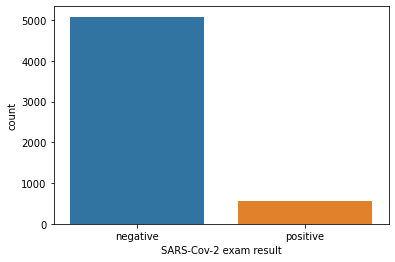

In [327]:
sns.countplot(df['SARS-Cov-2 exam result'])

In [329]:
len(df_cleaned)

5644

In [338]:
df_cleaned['SARS-Cov-2 exam result'].value_counts()

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

In [339]:
df_cleaned['SARS-Cov-2 exam result'] = np.where(df_cleaned['SARS-Cov-2 exam result'] == 'positive',1,0)

In [340]:
df_cleaned['SARS-Cov-2 exam result'].dtype

dtype('int32')

In [341]:
df_cleaned.info(verbose=2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 36 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Patient age quantile                                   5644 non-null   int64  
 1   SARS-Cov-2 exam result                                 5644 non-null   int32  
 2   Patient addmited to regular ward (1=yes, 0=no)         5644 non-null   int64  
 3   Patient addmited to semi-intensive unit (1=yes, 0=no)  5644 non-null   int64  
 4   Patient addmited to intensive care unit (1=yes, 0=no)  5644 non-null   int64  
 5   Hemoglobin                                             603 non-null    float64
 6   Platelets                                              602 non-null    float64
 7   Mean platelet volume                                   599 non-null    float64
 8   Red blood Cells                                 

In [335]:
# revised num and cat var.

In [342]:
num_var = _find_numerical_variables(df_cleaned)
cat_var = _find_categorical_variables(df_cleaned)

In [343]:
num_var

['Patient age quantile',
 'SARS-Cov-2 exam result',
 'Patient addmited to regular ward (1=yes, 0=no)',
 'Patient addmited to semi-intensive unit (1=yes, 0=no)',
 'Patient addmited to intensive care unit (1=yes, 0=no)',
 'Hemoglobin',
 'Platelets',
 'Mean platelet volume ',
 'Red blood Cells',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Leukocytes',
 'Basophils',
 'Mean corpuscular hemoglobin (MCH)',
 'Eosinophils',
 'Monocytes',
 'Red blood cell distribution width (RDW)']

In [344]:
cat_var

['Respiratory Syncytial Virus',
 'Influenza A',
 'Influenza B',
 'Parainfluenza 1',
 'CoronavirusNL63',
 'Rhinovirus/Enterovirus',
 'Coronavirus HKU1',
 'Parainfluenza 3',
 'Chlamydophila pneumoniae',
 'Adenovirus',
 'Parainfluenza 4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'Inf A H1N1 2009',
 'Bordetella pertussis',
 'Metapneumovirus',
 'Parainfluenza 2',
 'Influenza B, rapid test',
 'Influenza A, rapid test']

In [345]:
df_cleaned[cat_var] = df_cleaned[cat_var].fillna(value='missing')

In [346]:
df_cleaned[cat_var] = np.where(df_cleaned[cat_var] == 'missing',999,0)

In [347]:
df_cleaned

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,13,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999
1,17,0,0,0,0,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.357547,-0.625073,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999
3,5,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999
4,15,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,999,999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999
5640,17,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999
5641,4,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999
5642,10,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999


In [348]:
df_cleaned.isna().sum()

Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
Patient addmited to intensive care unit (1=yes, 0=no)       0
Hemoglobin                                               5041
Platelets                                                5042
Mean platelet volume                                     5045
Red blood Cells                                          5042
Lymphocytes                                              5042
Mean corpuscular hemoglobin concentration (MCHC)         5042
Leukocytes                                               5042
Basophils                                                5042
Mean corpuscular hemoglobin (MCH)                        5042
Eosinophils                                              5042
Monocytes                                                5043
Red bloo

In [349]:
num_var

['Patient age quantile',
 'SARS-Cov-2 exam result',
 'Patient addmited to regular ward (1=yes, 0=no)',
 'Patient addmited to semi-intensive unit (1=yes, 0=no)',
 'Patient addmited to intensive care unit (1=yes, 0=no)',
 'Hemoglobin',
 'Platelets',
 'Mean platelet volume ',
 'Red blood Cells',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Leukocytes',
 'Basophils',
 'Mean corpuscular hemoglobin (MCH)',
 'Eosinophils',
 'Monocytes',
 'Red blood cell distribution width (RDW)']

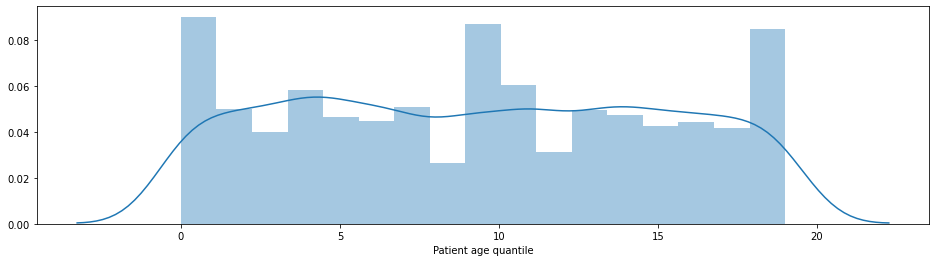

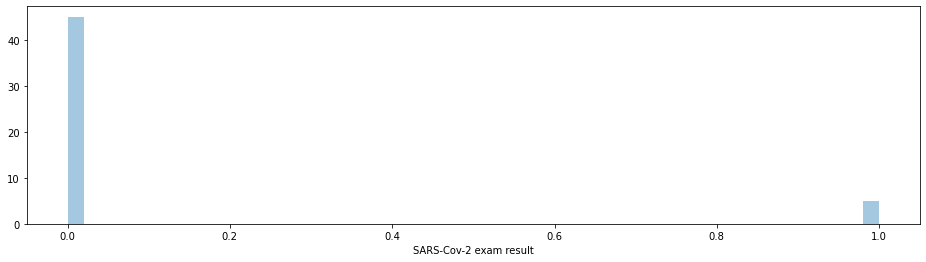

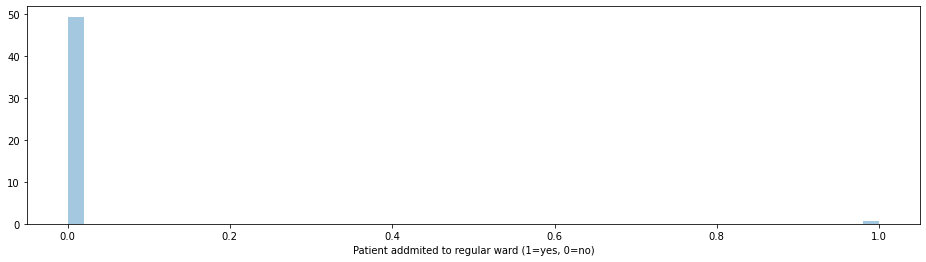

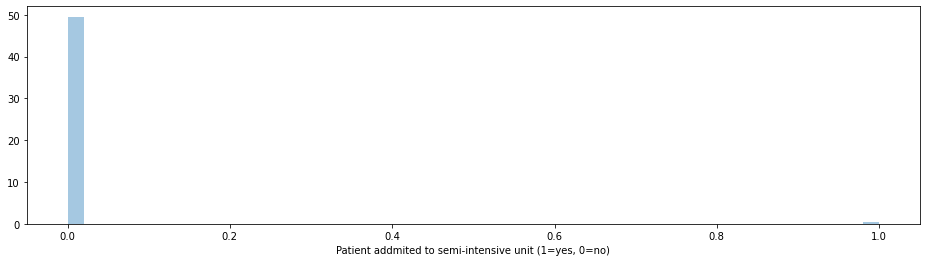

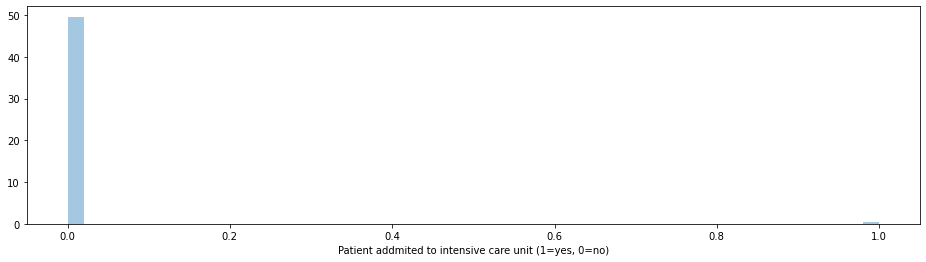

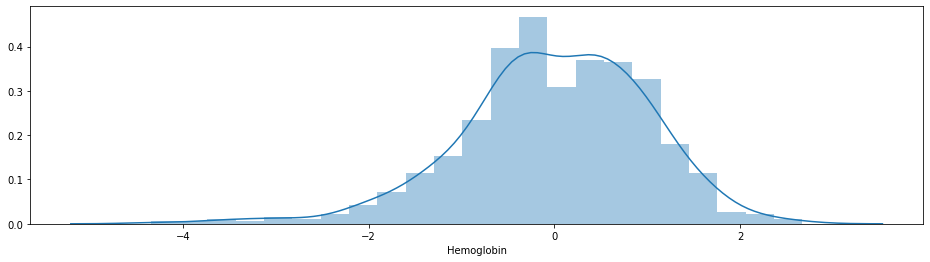

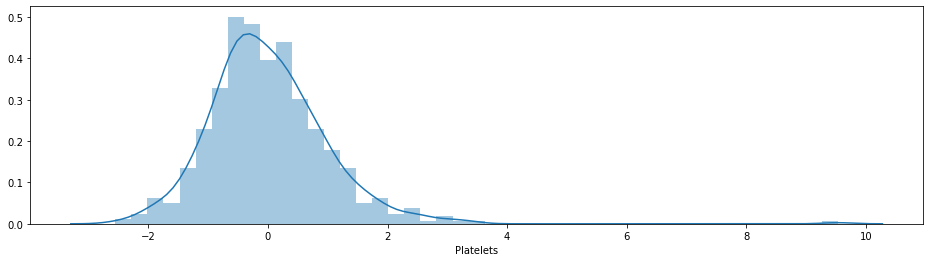

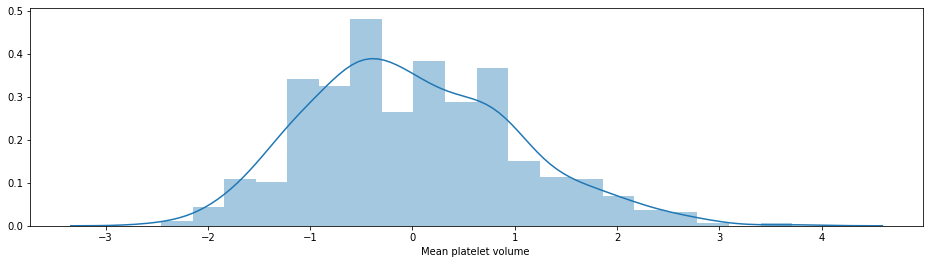

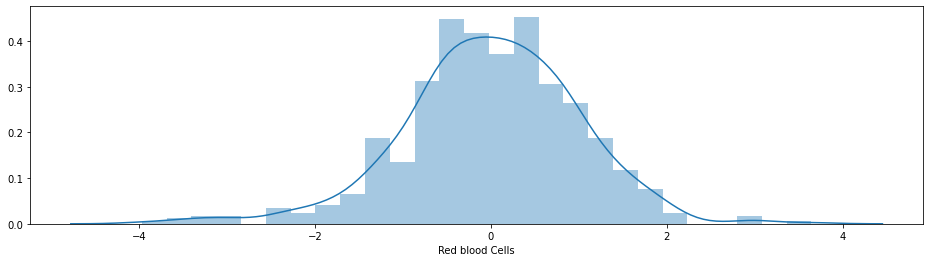

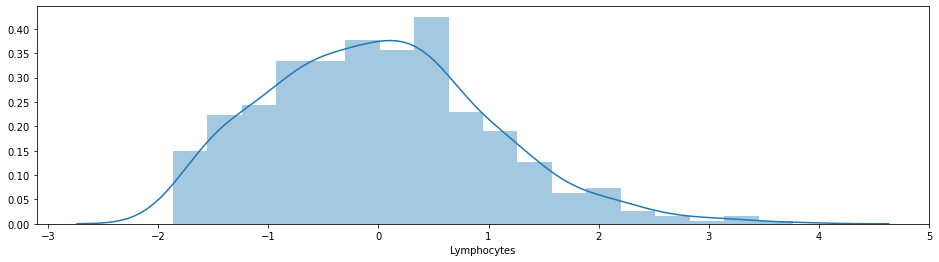

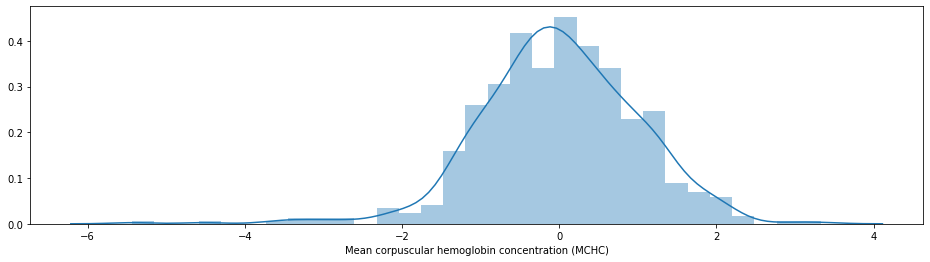

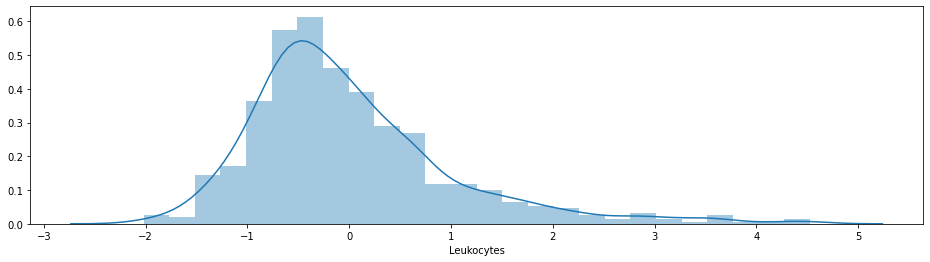

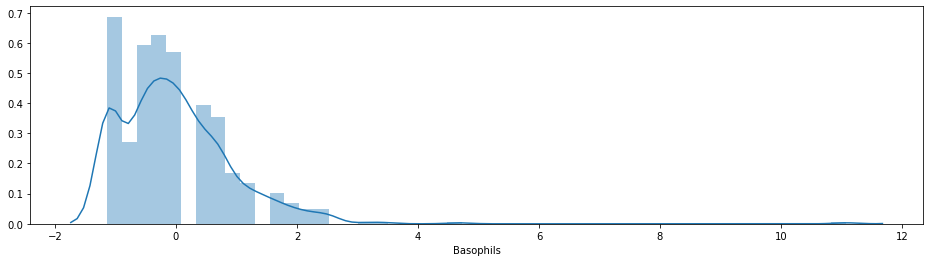

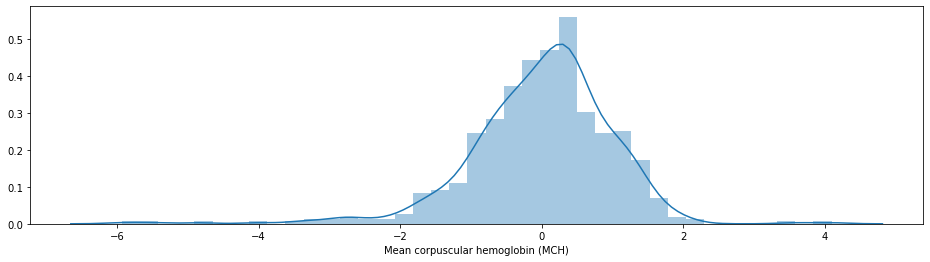

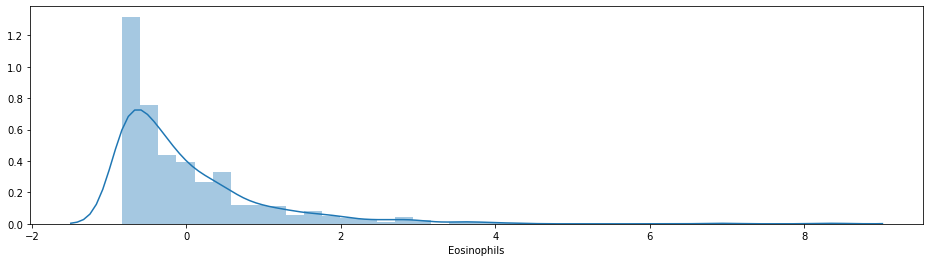

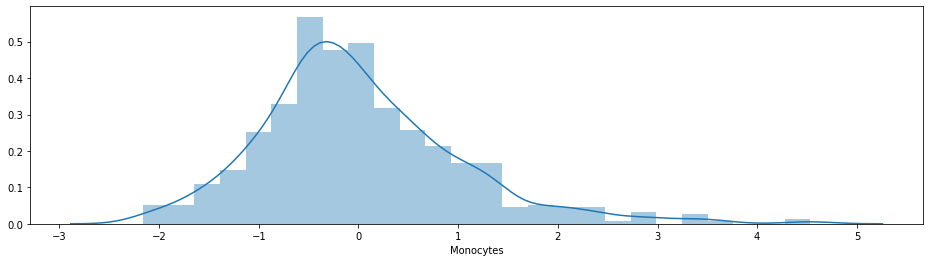

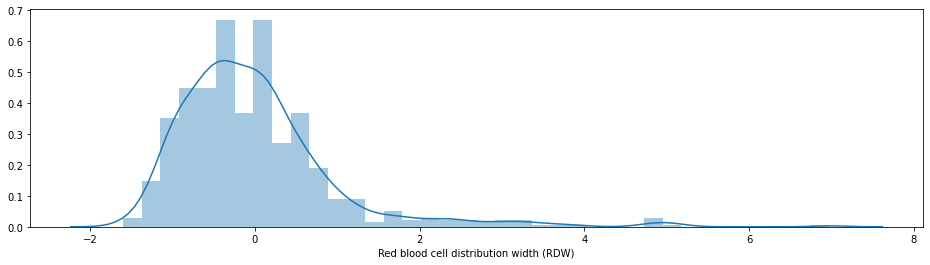

In [350]:
for col in num_var:
    fig_of_size(16,4)
    sns.distplot(df[col])

In [351]:
# imputing the numerical columns:

In [352]:
from feature_engine.missing_data_imputers import RandomSampleImputer

In [353]:
df_cleaned = RandomSampleImputer(variables=num_var).fit_transform(df_cleaned)

In [279]:
df_cleaned.isna().sum()

Patient age quantile                                     0
SARS-Cov-2 exam result                                   0
Patient addmited to regular ward (1=yes, 0=no)           0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0
Patient addmited to intensive care unit (1=yes, 0=no)    0
Hemoglobin                                               0
Platelets                                                0
Mean platelet volume                                     0
Red blood Cells                                          0
Lymphocytes                                              0
Mean corpuscular hemoglobin concentration (MCHC)         0
Leukocytes                                               0
Basophils                                                0
Mean corpuscular hemoglobin (MCH)                        0
Eosinophils                                              0
Monocytes                                                0
Red blood cell distribution width (RDW)                 

In [280]:
# comparing the distribution

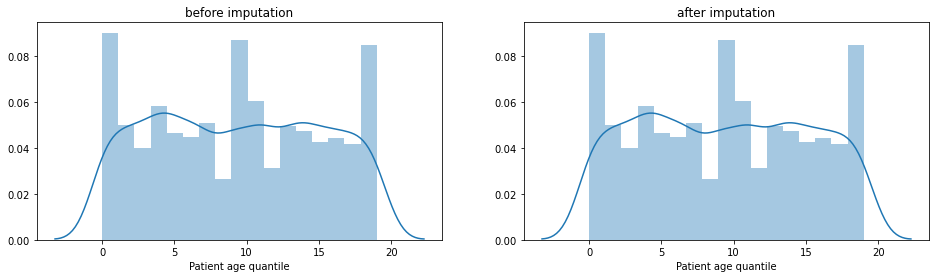

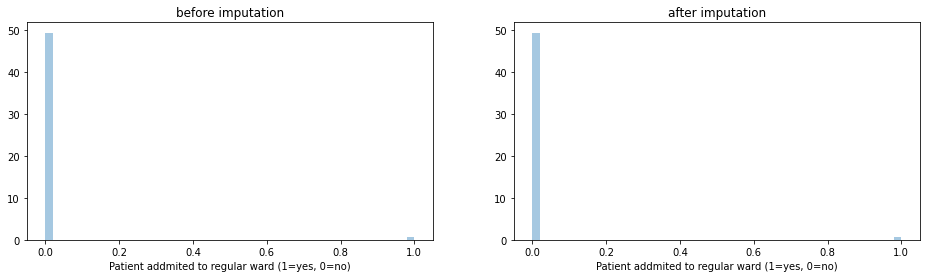

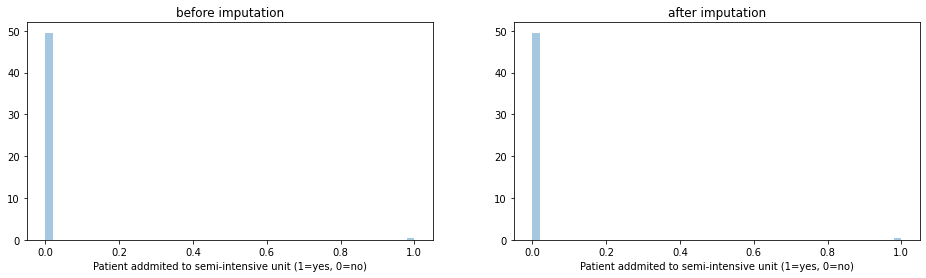

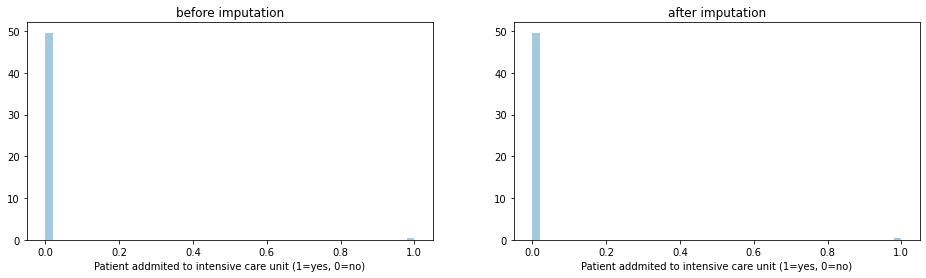

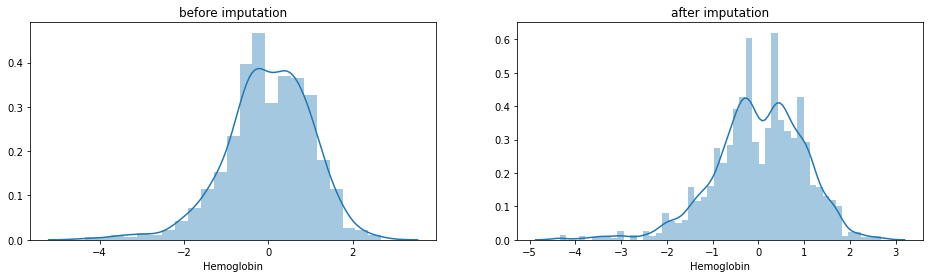

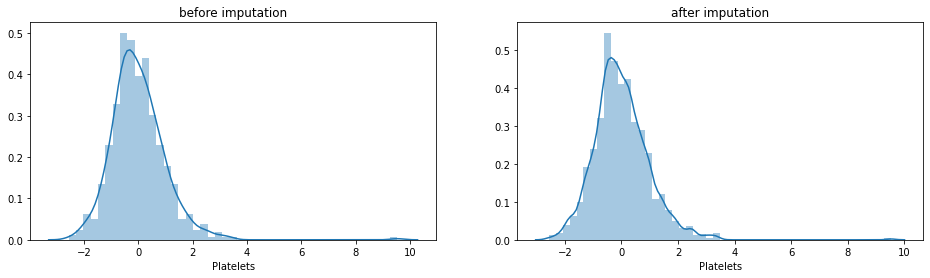

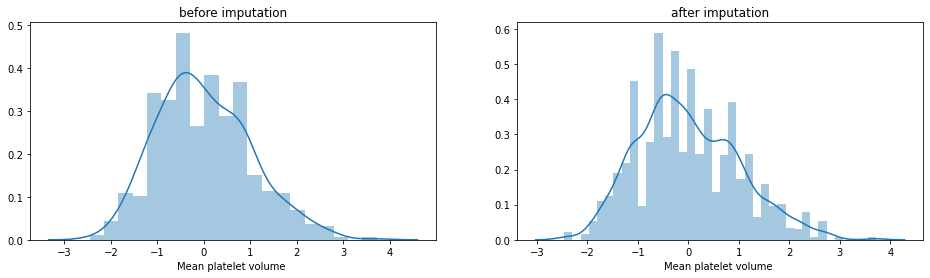

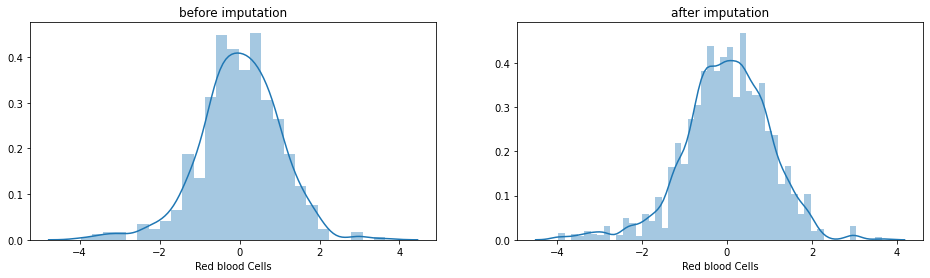

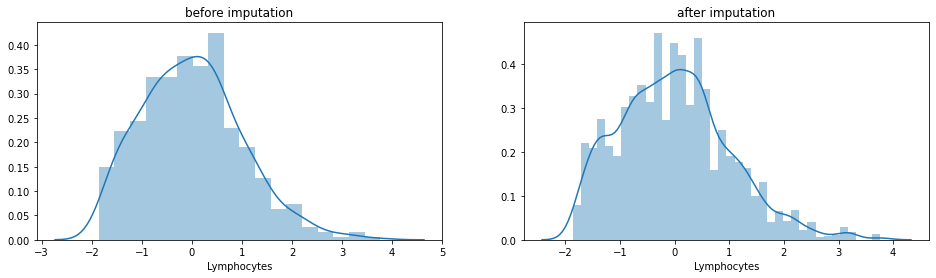

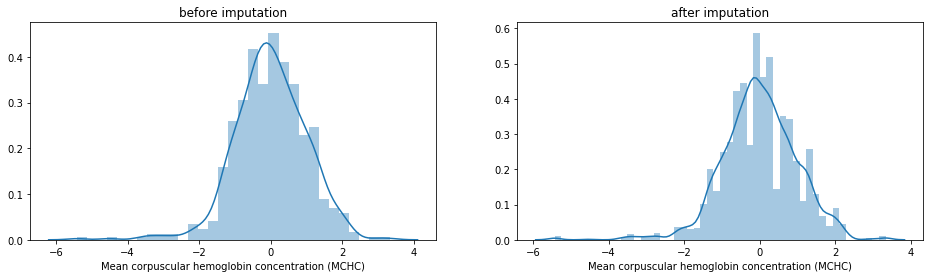

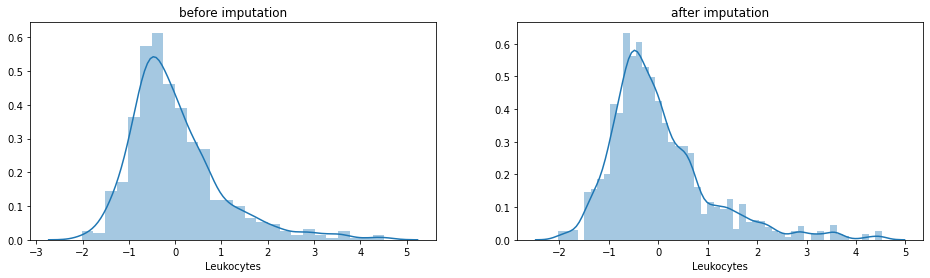

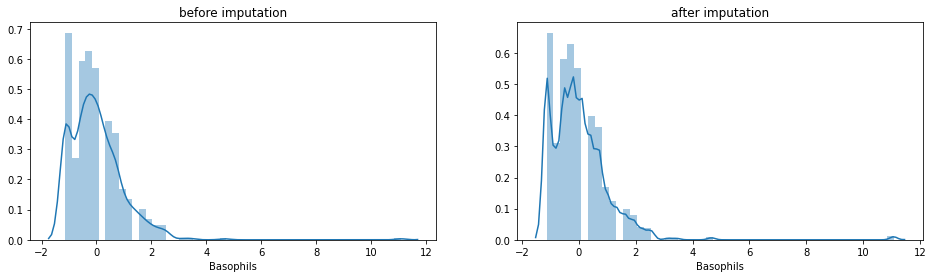

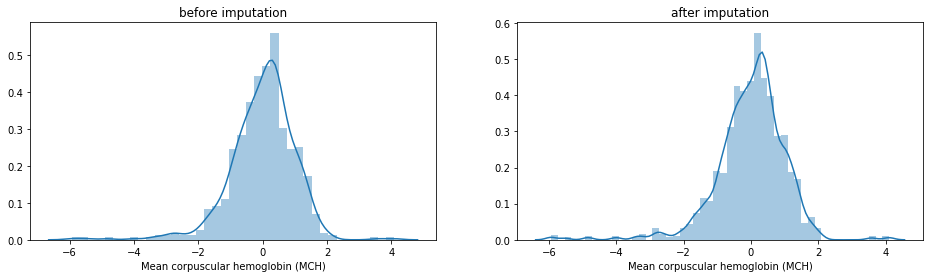

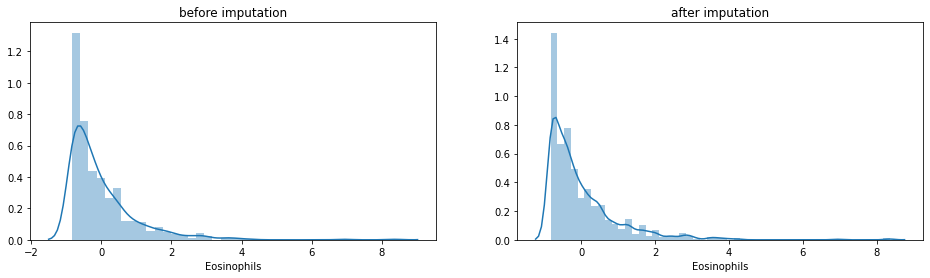

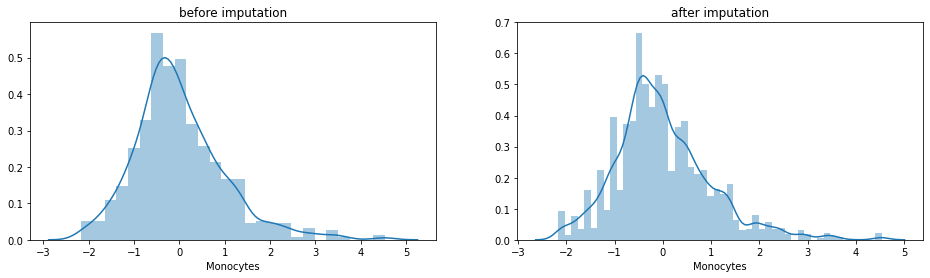

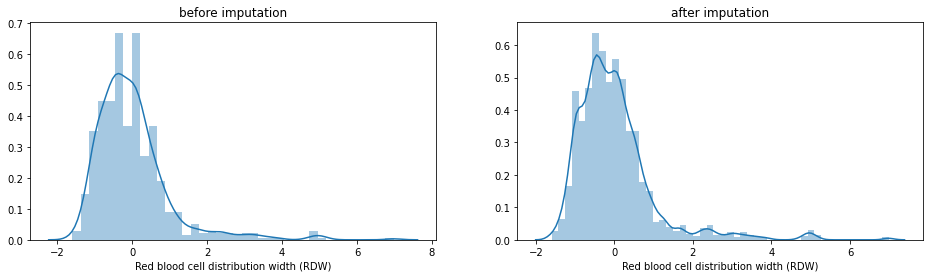

In [281]:
for col in num_var:
    fig = fig_of_size(16,4)
    
    fig.add_subplot(121)
    sns.distplot(df[col])
    plt.title('before imputation')
    fig.add_subplot(122)
    sns.distplot(df_cleaned[col])
    plt.title('after imputation')

In [282]:
# The random sample imputer works good.

In [200]:
df_cleaned = RandomSampleImputer(variables=num_var).fit_transform(df_cleaned)

In [354]:
df_cleaned.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,13,0,0,0,0,-1.400772,1.366858,1.132609,-0.779514,1.188328,0.343725,0.141927,-0.223767,-0.030911,1.060764,1.355549,-0.005877,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999
1,17,0,0,0,0,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.357547,-0.625073,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,1.042812,-1.007324,0.122869,0.313568,1.930355,0.343725,-0.692910,-1.140144,0.648619,-0.161278,-0.088928,-0.271247,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999
3,5,0,0,0,0,0.228284,1.366858,1.132609,-0.021409,0.523063,0.941197,-0.909968,-0.223767,0.230447,1.313601,3.377816,1.232513,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999
4,15,0,0,0,0,-0.084996,-0.454604,-0.774677,-0.850035,0.011320,0.343725,0.125230,-1.140144,-1.599060,1.566437,-0.719245,-1.067355,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,999,999


## Removing the outliers

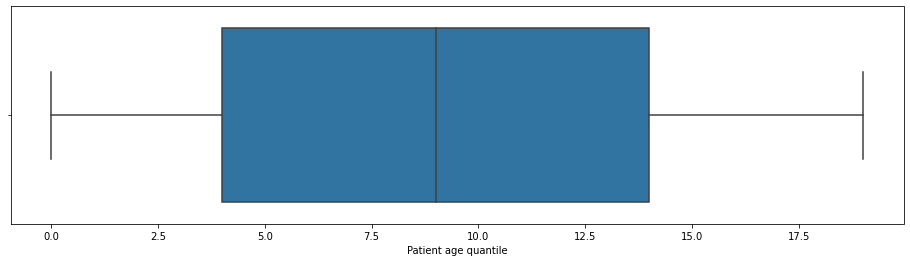

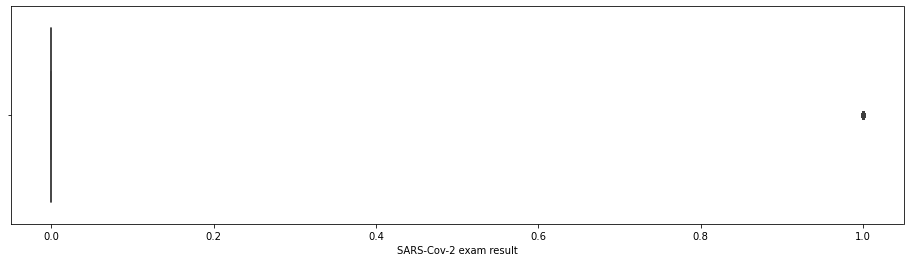

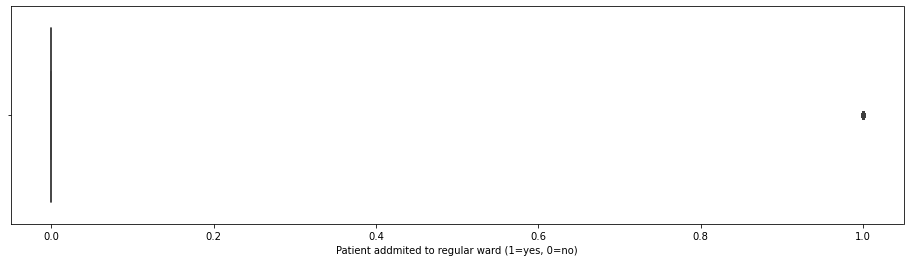

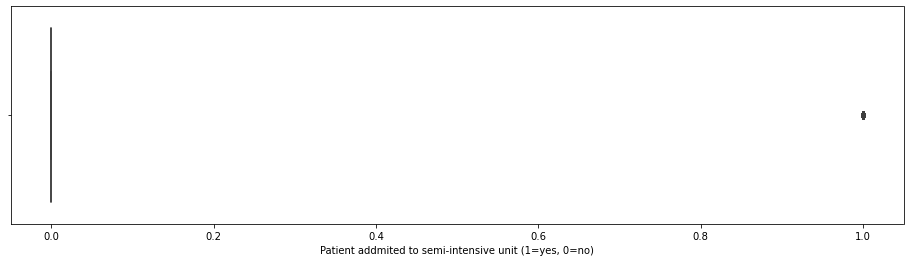

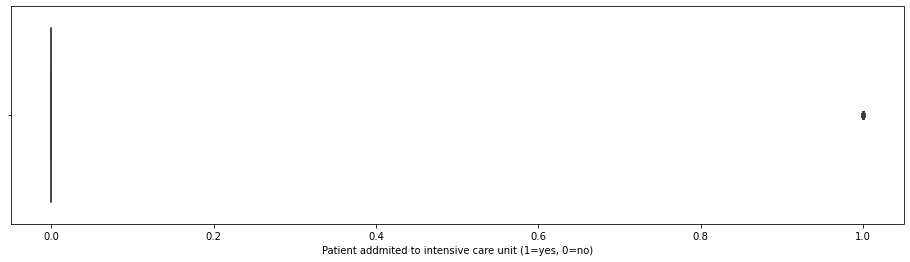

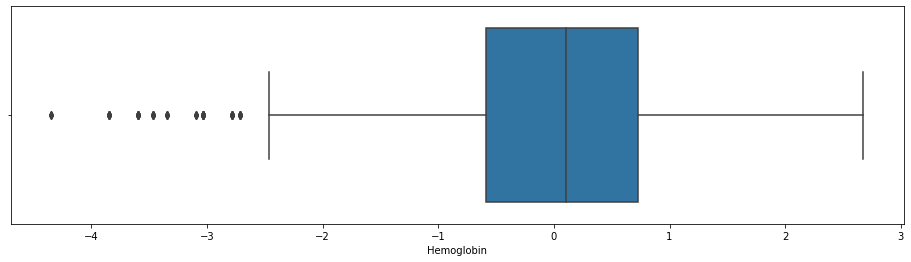

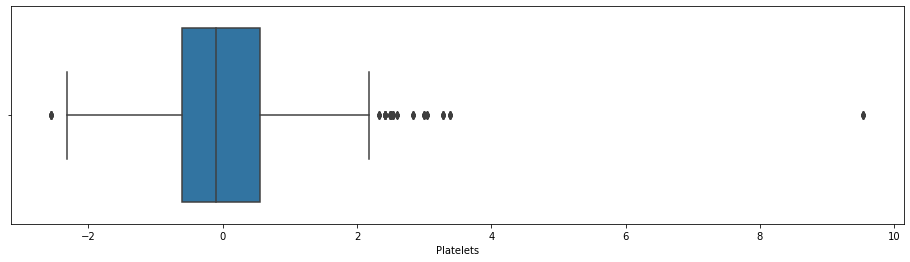

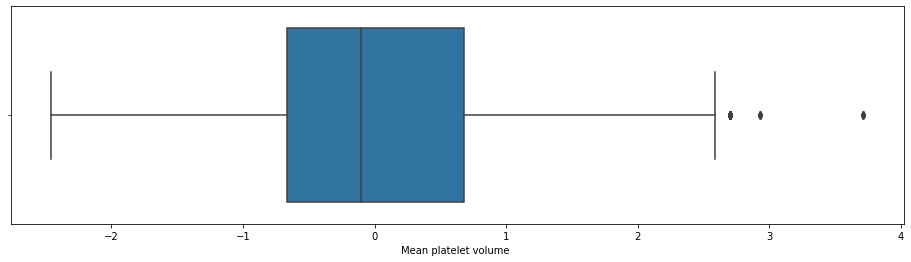

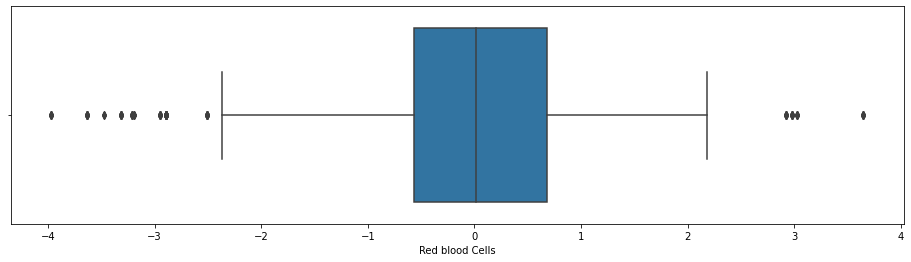

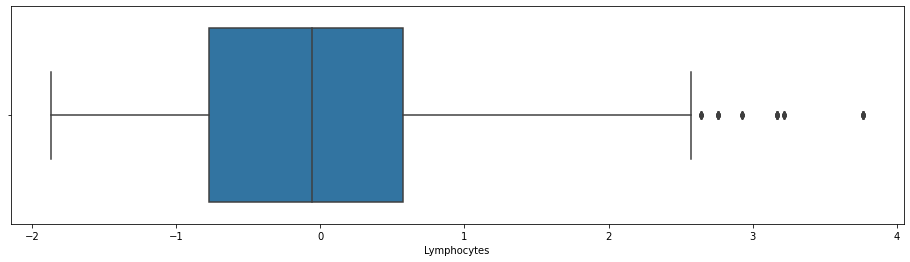

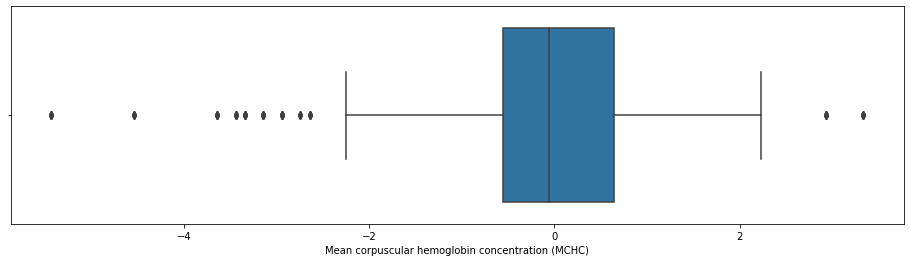

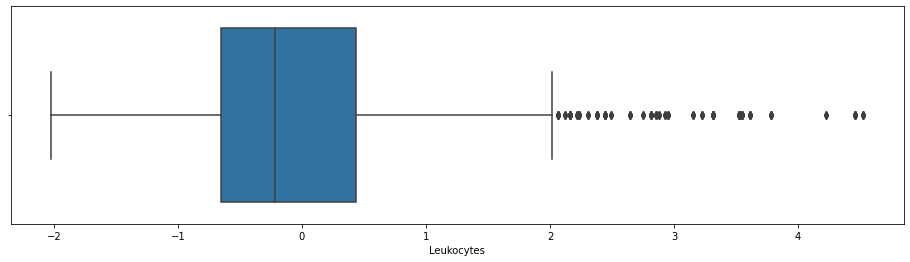

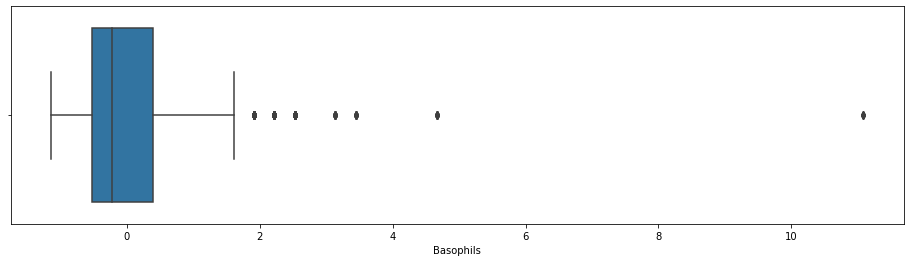

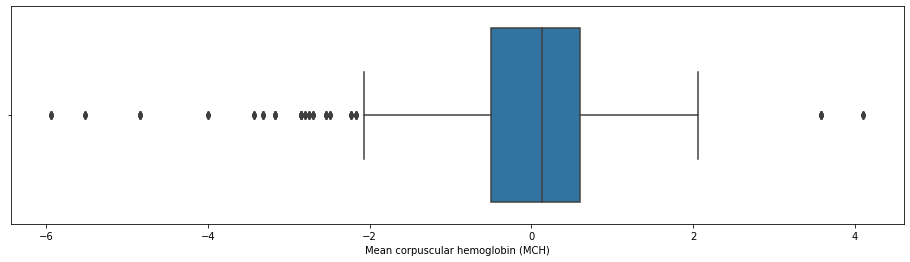

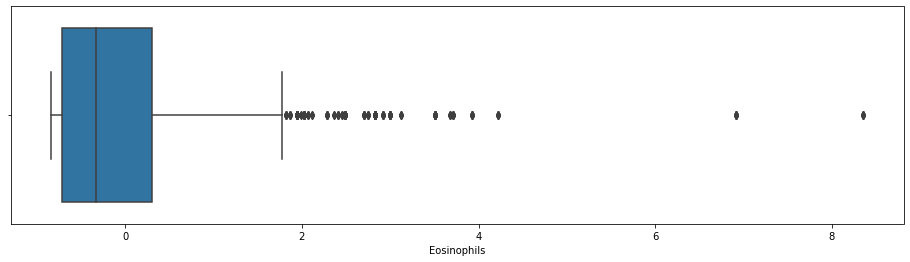

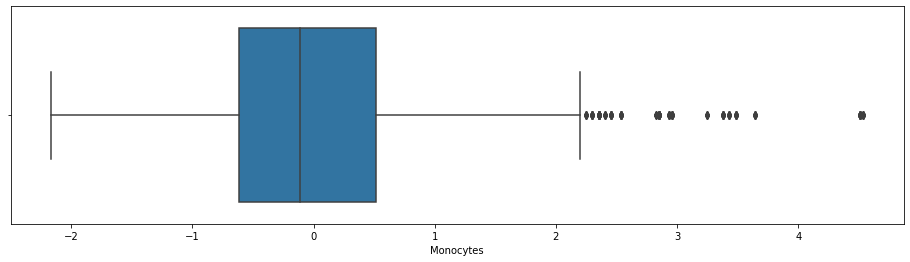

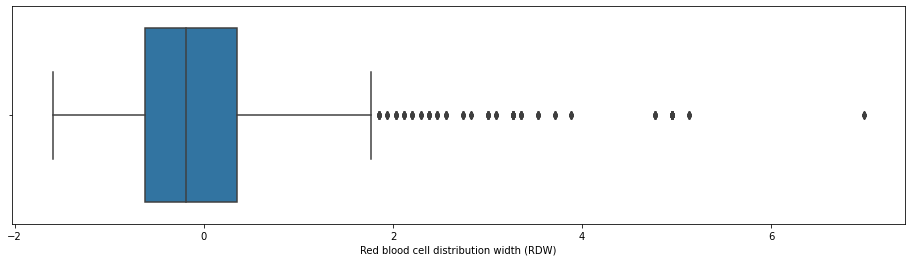

In [355]:
for col in num_var:
    fig_of_size(16,4)
    sns.boxplot(df_cleaned[col])

In [360]:
real_cont_values = num_var
real_cont_values.remove('Patient addmited to regular ward (1=yes, 0=no)')
real_cont_values.remove( 'Patient addmited to semi-intensive unit (1=yes, 0=no)')
real_cont_values.remove( 'Patient addmited to intensive care unit (1=yes, 0=no)')
real_cont_values.remove('SARS-Cov-2 exam result')

In [361]:
real_cont_values

['Patient age quantile',
 'Hemoglobin',
 'Platelets',
 'Mean platelet volume ',
 'Red blood Cells',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Leukocytes',
 'Basophils',
 'Mean corpuscular hemoglobin (MCH)',
 'Eosinophils',
 'Monocytes',
 'Red blood cell distribution width (RDW)']

In [358]:
# addressing the outliers using the z score

In [362]:
z_scores = stats.zscore(df_cleaned[real_cont_values])

abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)

df_cleaned = df_cleaned[filtered_entries]

In [363]:
df_cleaned.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,13,0,0,0,0,-1.400772,1.366858,1.132609,-0.779514,1.188328,0.343725,0.141927,-0.223767,-0.030911,1.060764,1.355549,-0.005877,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999
1,17,0,0,0,0,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.357547,-0.625073,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,1.042812,-1.007324,0.122869,0.313568,1.930355,0.343725,-0.692910,-1.140144,0.648619,-0.161278,-0.088928,-0.271247,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999
4,15,0,0,0,0,-0.084996,-0.454604,-0.774677,-0.850035,0.011320,0.343725,0.125230,-1.140144,-1.599060,1.566437,-0.719245,-1.067355,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,999,999
5,9,0,0,0,0,-0.335620,-0.253615,1.020415,0.401720,0.480418,-0.452899,-0.041737,0.081693,-0.083183,-0.161278,-0.692982,0.701775,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999


In [364]:
len(df) - len(df_cleaned)

756

* THere were 764 outliers in the dataset and we have successfully removed those samples.

## Skewness of the data.

In [365]:
df_cleaned[real_cont_values].skew()

Patient age quantile                                0.033906
Hemoglobin                                         -0.247209
Platelets                                           0.252646
Mean platelet volume                                0.351299
Red blood Cells                                    -0.196173
Lymphocytes                                         0.350503
Mean corpuscular hemoglobin concentration (MCHC)    0.037715
Leukocytes                                          0.900172
Basophils                                           0.755565
Mean corpuscular hemoglobin (MCH)                  -0.460597
Eosinophils                                         1.492743
Monocytes                                           0.555368
Red blood cell distribution width (RDW)             0.915054
dtype: float64

* The skew won't by any issue for the moelling, these skews are valid.

# `Task 1 `

## X and y split

In [366]:
X = df_cleaned.drop('SARS-Cov-2 exam result',1)
y = df_cleaned['SARS-Cov-2 exam result']

In [367]:
X.shape,y.shape

((4888, 35), (4888,))

In [368]:
X.head()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,13,0,0,0,-1.400772,1.366858,1.132609,-0.779514,1.188328,0.343725,0.141927,-0.223767,-0.030911,1.060764,1.355549,-0.005877,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999
1,17,0,0,0,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.357547,-0.625073,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,1.042812,-1.007324,0.122869,0.313568,1.930355,0.343725,-0.692910,-1.140144,0.648619,-0.161278,-0.088928,-0.271247,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999
4,15,0,0,0,-0.084996,-0.454604,-0.774677,-0.850035,0.011320,0.343725,0.125230,-1.140144,-1.599060,1.566437,-0.719245,-1.067355,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,999,999
5,9,0,0,0,-0.335620,-0.253615,1.020415,0.401720,0.480418,-0.452899,-0.041737,0.081693,-0.083183,-0.161278,-0.692982,0.701775,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999


In [370]:
y

0       0
1       0
2       0
4       0
5       0
       ..
5637    0
5638    0
5640    0
5641    0
5643    1
Name: SARS-Cov-2 exam result, Length: 4888, dtype: int32

## Feature Selection

In [408]:
feature_elimator = RandomForestRegressor()

In [409]:
feature_elimator.fit(X,y)

RandomForestRegressor()

In [411]:
feature_imp = feature_elimator.feature_importances_

In [412]:
feature_imp

array([0.07053504, 0.02710301, 0.00673839, 0.00747718, 0.06580084,
       0.08399623, 0.06247226, 0.07878426, 0.07878133, 0.06434159,
       0.09641248, 0.04603511, 0.07431888, 0.06560759, 0.07868642,
       0.0667429 , 0.00103521, 0.00102142, 0.00106106, 0.0011471 ,
       0.00108374, 0.00086709, 0.00112754, 0.00097265, 0.00087554,
       0.00132785, 0.00104928, 0.00113144, 0.0010238 , 0.00109021,
       0.00102731, 0.00130206, 0.00119668, 0.00341442, 0.0044121 ])

In [427]:
df_feat_imp = pd.DataFrame(list(zip(X.columns,feature_imp)),columns=['Feature','Importance'])

In [428]:
df_feat_imp

,Feature,Importance
0,Patient age quantile,0.070535
1,"Patient addmited to regular ward (1=yes, 0=no)",0.027103
2,Patient addmited to semi-intensive unit (1=yes...,0.006738
3,Patient addmited to intensive care unit (1=yes...,0.007477
4,Hemoglobin,0.065801
5,Platelets,0.083996
6,Mean platelet volume,0.062472
7,Red blood Cells,0.078784
8,Lymphocytes,0.078781
9,Mean corpuscular hemoglobin concentration (MCHC),0.064342


In [429]:
df_feat_imp.sort_values('Importance',ascending=False,inplace=True)

In [430]:
df_feat_imp

,Feature,Importance
10,Leukocytes,0.096412
5,Platelets,0.083996
7,Red blood Cells,0.078784
8,Lymphocytes,0.078781
14,Monocytes,0.078686
12,Mean corpuscular hemoglobin (MCH),0.074319
0,Patient age quantile,0.070535
15,Red blood cell distribution width (RDW),0.066743
4,Hemoglobin,0.065801
13,Eosinophils,0.065608


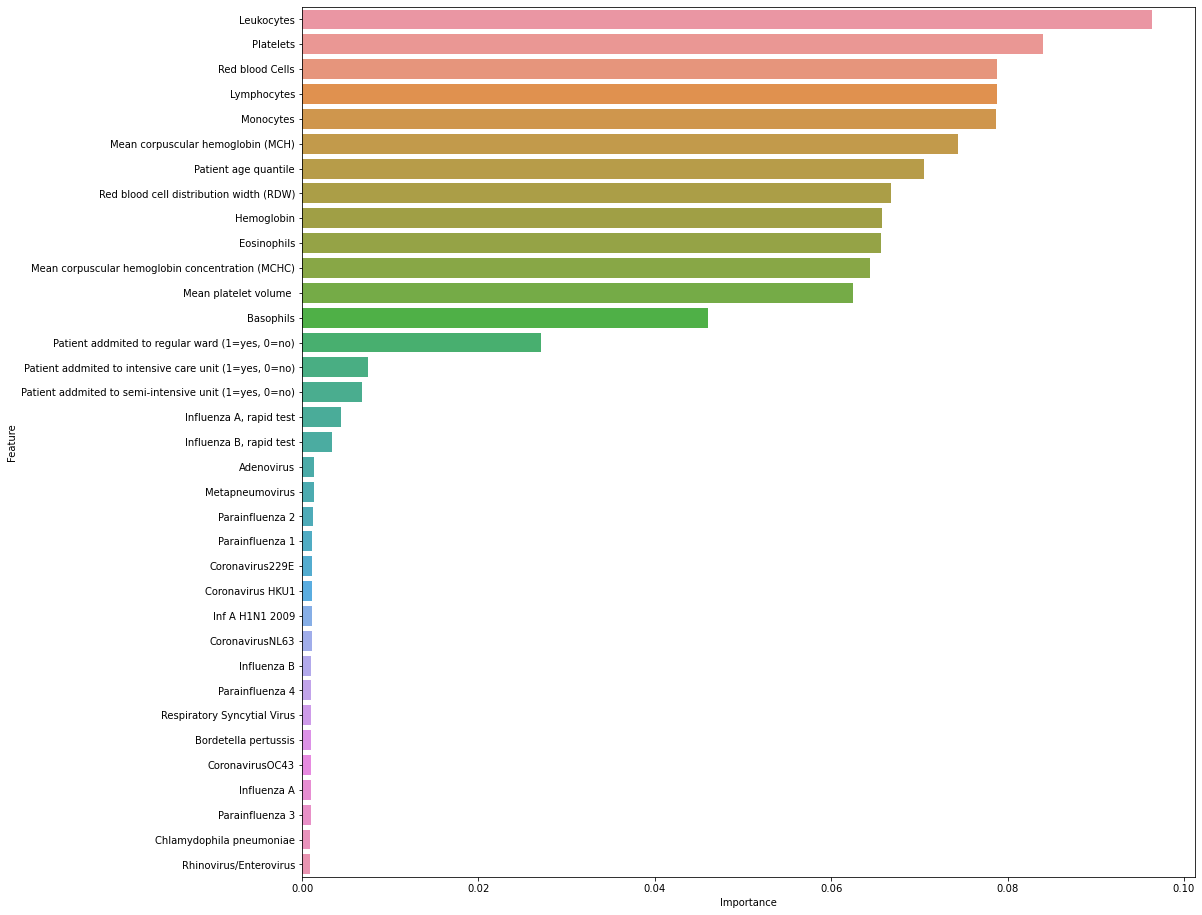

In [432]:
fig_of_size(16,16)
sns.barplot(df_feat_imp.Importance,df_feat_imp.Feature)

In [433]:
# let's remove the features with no importance

In [438]:
revised_columns = list(df_feat_imp[df_feat_imp.Importance > 0.002].Feature)

In [439]:
revised_columns

['Leukocytes',
 'Platelets',
 'Red blood Cells',
 'Lymphocytes',
 'Monocytes',
 'Mean corpuscular hemoglobin (MCH)',
 'Patient age quantile',
 'Red blood cell distribution width (RDW)',
 'Hemoglobin',
 'Eosinophils',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Mean platelet volume ',
 'Basophils',
 'Patient addmited to regular ward (1=yes, 0=no)',
 'Patient addmited to intensive care unit (1=yes, 0=no)',
 'Patient addmited to semi-intensive unit (1=yes, 0=no)',
 'Influenza A, rapid test',
 'Influenza B, rapid test']

In [443]:
X = X[revised_columns]

In [444]:
X.shape,y.shape

((4888, 18), (4888,))

## Train test split

In [445]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [446]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((3421, 18), (3421,), (1467, 18), (1467,))

## Building the model

In [452]:
# importing the training dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [453]:
# importing the evalation metrics 
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import f1_score,precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,classification_report

In [465]:
# helper funciton
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    print('Train_Acc:', model.score(X_train,y_train))
    print('Test_Acc:', model.score(X_test,y_test))


In [458]:
# try1 : Logistic Regression

train_n_ret_scores(LogisticRegression())

Train_Acc: 0.8959368605670857
Test_Acc: 0.9100204498977505


In [459]:
#try2: SVC
train_n_ret_scores(SVC(kernel='linear'))

Train_Acc: 0.8965214849459222
Test_Acc: 0.907293796864349


In [460]:
#try3: KNN
train_n_ret_scores(KNeighborsClassifier())

Train_Acc: 0.9035369774919614
Test_Acc: 0.9004771642808452


In [461]:
#try5: Decision Treaes
train_n_ret_scores(DecisionTreeClassifier())

Train_Acc: 1.0
Test_Acc: 0.8261758691206544


In [462]:
#try4: Random Forest
train_n_ret_scores(RandomForestClassifier())

Train_Acc: 1.0
Test_Acc: 0.9113837764144512


In [463]:
#try5: Gadient Boosting
train_n_ret_scores(GradientBoostingClassifier())

Train_Acc: 0.9123063431745104
Test_Acc: 0.9120654396728016


In [464]:
#try6: Adaboost
train_n_ret_scores(AdaBoostClassifier())

Train_Acc: 0.9014907921660333
Test_Acc: 0.9113837764144512


In [466]:
# choosing the best model


models = [LogisticRegression(),SVC(),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=200),GradientBoostingClassifier(n_estimators=150),AdaBoostClassifier(RandomForestClassifier())]
model_names = 'Logistic_reg SVC KNN Random_forest Decision_Treee Gradient_boost Adaboost'.split()
models_df = pd.DataFrame(columns=['Algo','Train_acc','Test_acc','Precision','Recall','F1_score','Avg_CV'])

for (model,model_names) in zip(models,model_names):
    print(model_names)
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    prec = precision_score(y_test,y_preds,average='micro')
    rec = recall_score(y_test,y_preds,average='micro')
    f1 = f1_score(y_test,y_preds,average='micro')
    
    avg_cv = np.mean(cross_val_score(model,X_train,y_train))
    
    models_df = models_df.append({'Algo':model_names,'Train_acc':train_acc,'Test_acc':test_acc,'Precision':prec,'Recall':rec,'F1_score':f1,'Avg_CV':avg_cv},ignore_index=True)

Logistic_reg
SVC
KNN
Random_forest
Decision_Treee
Gradient_boost
Adaboost


In [467]:
models_df

,Algo,Train_acc,Test_acc,Precision,Recall,F1_score,Avg_CV
0,Logistic_reg,0.895937,0.910020,0.910020,0.910020,0.910020,0.895937
1,SVC,0.895937,0.910020,0.910020,0.910020,0.910020,0.895937
2,KNN,0.903537,0.900477,0.900477,0.900477,0.900477,0.887460
3,Random_forest,1.000000,0.820041,0.820041,0.820041,0.820041,0.813800
4,Decision_Treee,1.000000,0.911384,0.911384,0.911384,0.911384,0.901491
5,Gradient_boost,0.918445,0.912065,0.912065,0.912065,0.912065,0.898860
6,Adaboost,1.000000,0.912065,0.912065,0.912065,0.912065,0.901784


* Adaboost is giving us the best result for this model.

In [468]:
best_model = AdaBoostClassifier()

In [470]:
train_n_ret_scores(best_model)

Train_Acc: 0.9014907921660333
Test_Acc: 0.9113837764144512


In [471]:
y_test = best_model.predict(X_test)

In [474]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [475]:
best_model.predict_log_proba(X_test)

array([[-0.65790208, -0.72968002],
       [-0.6495648 , -0.73871589],
       [-0.65363197, -0.73428831],
       ...,
       [-0.66943344, -0.71743695],
       [-0.67102357, -0.71577134],
       [-0.66457456, -0.72256026]])

In [479]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1453
           1       0.86      0.43      0.57        14

    accuracy                           0.99      1467
   macro avg       0.93      0.71      0.78      1467
weighted avg       0.99      0.99      0.99      1467



Text(0.5, 1.0, 'AUC Train Data')

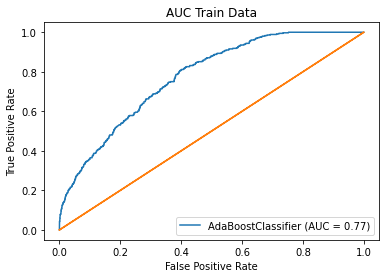

In [483]:
plot_roc_curve(best_model,X_train,y_train)
plt.plot(y_test,y_test)
plt.title('AUC Train Data')

Text(0.5, 1.0, 'AUC Test Data')

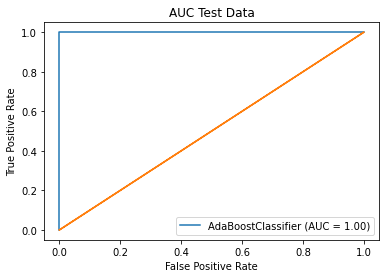

In [485]:
plot_roc_curve(best_model,X_test,y_test)
plt.plot(y_test,y_test)
plt.title('AUC Test Data')

## Saving the best model

In [583]:
import joblib
joblib.dump(best_model,'Brazil_covid_result_task_1.pkl')

['Brazil_covid_result_task_1.pkl']

# Task 2

In [486]:
df_cleaned

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,13,0,0,0,0,-1.400772,1.366858,1.132609,-0.779514,1.188328,0.343725,0.141927,-0.223767,-0.030911,1.060764,1.355549,-0.005877,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999
1,17,0,0,0,0,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.357547,-0.625073,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,1.042812,-1.007324,0.122869,0.313568,1.930355,0.343725,-0.692910,-1.140144,0.648619,-0.161278,-0.088928,-0.271247,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999
4,15,0,0,0,0,-0.084996,-0.454604,-0.774677,-0.850035,0.011320,0.343725,0.125230,-1.140144,-1.599060,1.566437,-0.719245,-1.067355,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,999,999
5,9,0,0,0,0,-0.335620,-0.253615,1.020415,0.401720,0.480418,-0.452899,-0.041737,0.081693,-0.083183,-0.161278,-0.692982,0.701775,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,12,0,0,0,0,-0.210308,-0.580222,-1.111256,-1.343685,1.657426,0.343725,0.740227,0.081693,1.171335,-0.666950,0.567652,-0.094334,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999
5638,14,0,0,0,0,0.102972,-0.756087,1.693575,0.401720,0.983631,-0.652057,0.333940,-1.140144,0.491805,-0.709090,-0.587929,0.524862,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999
5640,17,0,0,0,0,-0.711556,1.366858,-0.550290,-0.462168,0.028378,0.343725,0.562129,1.914447,1.328151,-0.371974,-0.666718,-0.271247,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999
5641,4,0,0,0,0,0.666876,-0.291300,1.244801,-2.507288,1.427141,-0.552476,-0.242098,0.081693,-0.083183,0.260116,0.987864,0.347948,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999


In [530]:
df_cleaned['Admitted_In_ward'] = 0

In [531]:
df_cleaned.Admitted_In_ward = df_cleaned['Patient addmited to regular ward (1=yes, 0=no)'].apply(lambda x:'Regular' if x == 1 else 'No-admitted')

In [532]:
df_cleaned.Admitted_In_ward.value_counts()

No-admitted    4818
Regular          70
Name: Admitted_In_ward, dtype: int64

In [536]:
df_cleaned.Admitted_In_ward = df_cleaned.Admitted_In_ward.mask(df_cleaned['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1 ,'Semi_Intensive')

In [538]:
df_cleaned.Admitted_In_ward = df_cleaned.Admitted_In_ward.mask(df_cleaned['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1 ,'Intensive')

In [540]:
set(df_cleaned.Admitted_In_ward)

{'Intensive', 'No-admitted', 'Regular', 'Semi_Intensive'}

In [541]:
df_cleaned.Admitted_In_ward.value_counts()

No-admitted       4750
Regular             70
Semi_Intensive      42
Intensive           26
Name: Admitted_In_ward, dtype: int64

In [542]:
df_cleaned.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test",Admitted_In_ward
0,13,0,0,0,0,-1.400772,1.366858,1.132609,-0.779514,1.188328,0.343725,0.141927,-0.223767,-0.030911,1.060764,1.355549,-0.005877,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,No-admitted
1,17,0,0,0,0,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.357547,-0.625073,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No-admitted
2,8,0,0,0,0,1.042812,-1.007324,0.122869,0.313568,1.930355,0.343725,-0.692910,-1.140144,0.648619,-0.161278,-0.088928,-0.271247,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,No-admitted
4,15,0,0,0,0,-0.084996,-0.454604,-0.774677,-0.850035,0.011320,0.343725,0.125230,-1.140144,-1.599060,1.566437,-0.719245,-1.067355,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,999,999,No-admitted
5,9,0,0,0,0,-0.335620,-0.253615,1.020415,0.401720,0.480418,-0.452899,-0.041737,0.081693,-0.083183,-0.161278,-0.692982,0.701775,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,No-admitted


In [543]:
# drop the redundaant columns

In [544]:
df_cleaned.drop(['Patient addmited to regular ward (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to intensive care unit (1=yes, 0=no)'],1,inplace=True)

In [558]:
df_cleaned.head()

,Patient age quantile,SARS-Cov-2 exam result,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test",Admitted_In_ward
0,13,0,-1.400772,1.366858,1.132609,-0.779514,1.188328,0.343725,0.141927,-0.223767,-0.030911,1.060764,1.355549,-0.005877,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,0
1,17,0,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.357547,-0.625073,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8,0,1.042812,-1.007324,0.122869,0.313568,1.930355,0.343725,-0.692910,-1.140144,0.648619,-0.161278,-0.088928,-0.271247,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,0
4,15,0,-0.084996,-0.454604,-0.774677,-0.850035,0.011320,0.343725,0.125230,-1.140144,-1.599060,1.566437,-0.719245,-1.067355,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,999,999,0
5,9,0,-0.335620,-0.253615,1.020415,0.401720,0.480418,-0.452899,-0.041737,0.081693,-0.083183,-0.161278,-0.692982,0.701775,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,0


In [546]:
## Label Encoding the target variable.

In [ ]:
## getting only the values with non zero importance 

In [551]:
from feature_engine.categorical_encoders import OrdinalCategoricalEncoder
oce = OrdinalCategoricalEncoder(encoding_method='arbitrary',variables=['Admitted_In_ward'])

In [554]:
df_cleaned = oce.fit_transform(df_cleaned)

In [555]:
df_cleaned.head()

,Patient age quantile,SARS-Cov-2 exam result,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test",Admitted_In_ward
0,13,0,-1.400772,1.366858,1.132609,-0.779514,1.188328,0.343725,0.141927,-0.223767,-0.030911,1.060764,1.355549,-0.005877,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,0
1,17,0,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.357547,-0.625073,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8,0,1.042812,-1.007324,0.122869,0.313568,1.930355,0.343725,-0.692910,-1.140144,0.648619,-0.161278,-0.088928,-0.271247,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,0
4,15,0,-0.084996,-0.454604,-0.774677,-0.850035,0.011320,0.343725,0.125230,-1.140144,-1.599060,1.566437,-0.719245,-1.067355,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,999,999,0
5,9,0,-0.335620,-0.253615,1.020415,0.401720,0.480418,-0.452899,-0.041737,0.081693,-0.083183,-0.161278,-0.692982,0.701775,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,0


## X and y split

In [556]:
X = df_cleaned.iloc[:,:-1]
y = df_cleaned.iloc[:,-1]

In [557]:
X.shape,y.shape

((4888, 33), (4888,))

In [561]:
# training the featires with only the features with non zero importance 

In [563]:
revised_columns

['Leukocytes',
 'Platelets',
 'Red blood Cells',
 'Lymphocytes',
 'Monocytes',
 'Mean corpuscular hemoglobin (MCH)',
 'Patient age quantile',
 'Red blood cell distribution width (RDW)',
 'Hemoglobin',
 'Eosinophils',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Mean platelet volume ',
 'Basophils',
 'Patient addmited to regular ward (1=yes, 0=no)',
 'Patient addmited to intensive care unit (1=yes, 0=no)',
 'Patient addmited to semi-intensive unit (1=yes, 0=no)',
 'Influenza A, rapid test',
 'Influenza B, rapid test']

In [564]:
revised_columns.remove('Patient addmited to regular ward (1=yes, 0=no)')
revised_columns.remove( 'Patient addmited to semi-intensive unit (1=yes, 0=no)')
revised_columns.remove( 'Patient addmited to intensive care unit (1=yes, 0=no)')

In [565]:
revised_columns

['Leukocytes',
 'Platelets',
 'Red blood Cells',
 'Lymphocytes',
 'Monocytes',
 'Mean corpuscular hemoglobin (MCH)',
 'Patient age quantile',
 'Red blood cell distribution width (RDW)',
 'Hemoglobin',
 'Eosinophils',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Mean platelet volume ',
 'Basophils',
 'Influenza A, rapid test',
 'Influenza B, rapid test']

In [566]:
X = X[revised_columns]

In [567]:
X

,Leukocytes,Platelets,Red blood Cells,Lymphocytes,Monocytes,Mean corpuscular hemoglobin (MCH),Patient age quantile,Red blood cell distribution width (RDW),Hemoglobin,Eosinophils,Mean corpuscular hemoglobin concentration (MCHC),Mean platelet volume,Basophils,"Influenza A, rapid test","Influenza B, rapid test"
0,0.141927,1.366858,-0.779514,1.188328,1.355549,-0.030911,13,-0.005877,-1.400772,1.060764,0.343725,1.132609,-0.223767,999,999
1,-0.094610,-0.517413,0.102004,0.318366,0.357547,-0.292269,17,-0.625073,-0.022340,1.482158,-0.950790,0.010677,-0.223767,0,0
2,-0.692910,-1.007324,0.313568,1.930355,-0.088928,0.648619,8,-0.271247,1.042812,-0.161278,0.343725,0.122869,-1.140144,999,999
4,0.125230,-0.454604,-0.850035,0.011320,-0.719245,-1.599060,15,-1.067355,-0.084996,1.566437,0.343725,-0.774677,-1.140144,999,999
5,-0.041737,-0.253615,0.401720,0.480418,-0.692982,-0.083183,9,0.701775,-0.335620,-0.161278,-0.452899,1.020415,0.081693,999,999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,0.740227,-0.580222,-1.343685,1.657426,0.567652,1.171335,12,-0.094334,-0.210308,-0.666950,0.343725,-1.111256,0.081693,999,999
5638,0.333940,-0.756087,0.401720,0.983631,-0.587929,0.491805,14,0.524862,0.102972,-0.709090,-0.652057,1.693575,-1.140144,999,999
5640,0.562129,1.366858,-0.462168,0.028378,-0.666718,1.328151,17,-0.271247,-0.711556,-0.371974,0.343725,-0.550290,1.914447,999,999
5641,-0.242098,-0.291300,-2.507288,1.427141,0.987864,-0.083183,4,0.347948,0.666876,0.260116,-0.552476,1.244801,0.081693,999,999


In [568]:
# final shapes

In [569]:
X.shape,y.shape

((4888, 15), (4888,))

In [570]:
## Train and test split

In [571]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [572]:
# checking the shapes again
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((3421, 15), (3421,), (1467, 15), (1467,))

In [573]:
# try1 : Logistic Regression

train_n_ret_scores(LogisticRegression())

Train_Acc: 0.9736919029523531
Test_Acc: 0.9686434901158828


In [574]:
#try2: SVC
train_n_ret_scores(SVC(kernel='linear'))

Train_Acc: 0.9731072785735165
Test_Acc: 0.9686434901158828


In [575]:
#try2: SVC
train_n_ret_scores(SVC())

Train_Acc: 0.9731072785735165
Test_Acc: 0.9686434901158828


In [576]:
#try3: KNN
train_n_ret_scores(KNeighborsClassifier())

Train_Acc: 0.9739842151417714
Test_Acc: 0.9679618268575324


In [577]:
#try5: Decision Treaes
train_n_ret_scores(DecisionTreeClassifier())

Train_Acc: 1.0
Test_Acc: 0.9393319700068167


In [578]:
#try4: Random Forest
train_n_ret_scores(RandomForestClassifier())

Train_Acc: 0.9997076878105817
Test_Acc: 0.9686434901158828


In [579]:
#try5: Gadient Boosting
train_n_ret_scores(GradientBoostingClassifier())

Train_Acc: 0.997076878105817
Test_Acc: 0.9638718473074301


In [580]:
#try6: Adaboost
train_n_ret_scores(AdaBoostClassifier())

Train_Acc: 0.8406898567670272
Test_Acc: 0.8384458077709611


In [581]:
#try7: Adaboost
train_n_ret_scores(AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))

Train_Acc: 1.0
Test_Acc: 0.9420586230402181


In [582]:
# choosing the best model


models = [LogisticRegression(),SVC(),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=200),GradientBoostingClassifier(n_estimators=150),AdaBoostClassifier(RandomForestClassifier())]
model_names = 'Logistic_reg SVC KNN Random_forest Decision_Treee Gradient_boost Adaboost'.split()
models_df = pd.DataFrame(columns=['Algo','Train_acc','Test_acc','Precision','Recall','F1_score','Avg_CV'])

for (model,model_names) in zip(models,model_names):
    print(model_names)
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    prec = precision_score(y_test,y_preds,average='micro')
    rec = recall_score(y_test,y_preds,average='micro')
    f1 = f1_score(y_test,y_preds,average='micro')
    
    avg_cv = np.mean(cross_val_score(model,X_train,y_train))
    
    models_df = models_df.append({'Algo':model_names,'Train_acc':train_acc,'Test_acc':test_acc,'Precision':prec,'Recall':rec,'F1_score':f1,'Avg_CV':avg_cv},ignore_index=True)

Logistic_reg
SVC
KNN
Random_forest
Decision_Treee
Gradient_boost
Adaboost


In [584]:
models_df

,Algo,Train_acc,Test_acc,Precision,Recall,F1_score,Avg_CV
0,Logistic_reg,0.973692,0.968643,0.968643,0.968643,0.968643,0.973400
1,SVC,0.973107,0.968643,0.968643,0.968643,0.968643,0.973108
2,KNN,0.973984,0.967962,0.967962,0.967962,0.967962,0.972816
3,Random_forest,1.000000,0.946149,0.946149,0.946149,0.946149,0.945338
4,Decision_Treee,1.000000,0.968643,0.968643,0.968643,0.968643,0.973108
5,Gradient_boost,0.999708,0.964554,0.964554,0.964554,0.964554,0.968723
6,Adaboost,1.000000,0.968643,0.968643,0.968643,0.968643,0.973108


In [585]:
# All the models are giving us best reuslts 

In [586]:
# let's Select decision tree as our final model as it gnenralizes better

In [587]:
best_model_2 = DecisionTreeClassifier()

In [588]:
train_n_ret_scores(best_model_2)

Train_Acc: 1.0
Test_Acc: 0.94546693933197


In [589]:
y_preds = best_model_2.predict(X_test)

In [592]:
y_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [593]:
set(y_preds)

{0, 1, 2, 3}

In [595]:
# classification score

In [597]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1421
           1       0.08      0.10      0.09        20
           2       0.18      0.21      0.19        14
           3       0.20      0.17      0.18        12

    accuracy                           0.95      1467
   macro avg       0.36      0.36      0.36      1467
weighted avg       0.95      0.95      0.95      1467



In [598]:
# we do not use confusion matrix for these kinda unbalanced target classes classifier.

In [600]:
## Saving our best model for the task 2

In [601]:
joblib.dump(best_model_2,'covid_Predict_Ward_task_2.pkl')

['covid_Predict_Ward_task_2.pkl']